### Importing Librararies and loading the data

In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
import openpyxl
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,auc,f1_score,precision_recall_curve,precision_score,recall_score

In [10]:
inspection = pd.read_csv(r'C:\Users\nick2\Desktop\INFORMAC\LOS_ANGELES_COUNTY_RESTAURANT_AND_MARKET_INSPECTIONS.csv')
violation = pd.read_csv(r'C:\Users\nick2\Desktop\INFORMAC\LOS_ANGELES_COUNTY_RESTAURANT_AND_MARKET_VIOLATIONS.csv')
demographics = pd.read_excel(r'C:\Users\nick2\Desktop\INFORMAC\sid.xlsx')
newdata= pd.read_csv(r'C:\Users\nick2\Desktop\INFORMAC\external_crime_data.csv')

## Data Sources
- inspection and violation are the datasets provided to us.
- demographics and newdata are new datasets created by merging original data provided and scraped data (demographics data and crime data) from the web for LA county 

## Data Exploration and Preprocessing

In [11]:
print(newdata.shape)
newdata.columns

(204953, 43)


Index(['ACTIVITY DATE', 'OWNER ID', 'OWNER NAME', 'FACILITY ID',
       'FACILITY NAME', 'RECORD ID', 'PROGRAM NAME', 'PROGRAM STATUS',
       'PROGRAM ELEMENT (PE)', 'PE DESCRIPTION', 'FACILITY ADDRESS',
       'FACILITY CITY', 'FACILITY STATE', 'FACILITY ZIP', 'Unnamed: 14',
       'SERVICE CODE', 'SERVICE DESCRIPTION', 'SCORE', 'GRADE',
       'SERIAL NUMBER', 'EMPLOYEE ID', 'division1', 'division2', 'division3',
       'division4', 'division5', ' Households ', 'Families',
       'Non-Family Households', 'Total Violent Crimes', 'Homicide',
       'Forcible Rape', 'Robbery', 'Aggravate Assault',
       'Total Property Crimes (Arson not included)', 'Burglary',
       'Vehicle Theft', 'Larceny-Theft', 'Arson', 'Labor Force', 'Employment',
       'Unemployment Number', 'Unemployment rate'],
      dtype='object')

In [12]:
newdata.head()

,ACTIVITY DATE,OWNER ID,OWNER NAME,FACILITY ID,FACILITY NAME,RECORD ID,PROGRAM NAME,PROGRAM STATUS,PROGRAM ELEMENT (PE),PE DESCRIPTION,...,Aggravate Assault,Total Property Crimes (Arson not included),Burglary,Vehicle Theft,Larceny-Theft,Arson,Labor Force,Employment,Unemployment Number,Unemployment rate
0,6/1/2016,OW0022471,LUCY'S DRIVE THRU INC,FA0003655,5 DE MAYO,PR0005766,5 DE MAYO,ACTIVE,1632,RESTAURANT (0-30) SEATS HIGH RISK,...,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035
1,6/1/2016,OW0124734,PAUL V ANAND,FA0159730,7-ELEVEN STORE 18341D,PR0147792,7-ELEVEN STORE 18341D,ACTIVE,1614,"FOOD MKT RETAIL (2,000+ SF) MODERATE RISK",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6/1/2016,OW0182158,"CHARR, INC",FA0175631,7-ELEVEN STORE 37021A,PR0168801,7-ELEVEN STORE 37021A,ACTIVE,1611,"FOOD MKT RETAIL (1-1,999 SF) MODERATE RISK",...,691.0,2583.0,411.0,770.0,1402.0,54.0,40900.0,37800.0,3100.0,0.076
3,6/1/2016,OW0023416,"MARISCAL, ESTELA",FA0056876,98 CENT DISCOUT STORE & MKT,PR0020223,98 CENT DISCOUT STORE & MKT,ACTIVE,1610,"FOOD MKT RETAIL (1-1,999 SF) LOW RISK",...,217.0,1817.0,210.0,704.0,903.0,12.0,27900.0,26100.0,1800.0,0.064
4,6/1/2016,OW0035124,"TAWA SUPERMARKET, INC",FA0002592,99 RANCH MARKET #7,PR0026148,99 RANCH MARKET #7 BAKERY,ACTIVE,1631,RESTAURANT (0-30) SEATS MODERATE RISK,...,33.0,1534.0,485.0,92.0,957.0,0.0,29800.0,29000.0,800.0,0.028


In [13]:
demographics.columns

Index(['City', 'Population', 'Per Capita Income', 'Median Household Income',
       '% Of Population In Workforce', '% With High School Degree',
       '% With Bachelor Degree', '% With Graduate Degree', '# Of Businesses',
       'Division', 'Incorporated', 'Total Revenue', 'per_capita',
       'Total Taxes', 'per_capita1', 'Total General Government Spending',
       'per_capita2', 'Total Human Services Spending', 'per_capita3', 'White',
       'Hispanic Or Latino', 'Asian', 'Two Or More Races',
       'Black Or African American', 'Other',
       'American Indian And Alaskan Native Alone',
       'Native Hawaiian And Other Pacific Islander'],
      dtype='object')

In [14]:
# Setting the maximum columns display option to 500
pd.set_option('display.max_columns', 500)
newdata.drop(columns=['Unnamed: 14', 'division1','division2','division3','division4','division5'],axis=1, inplace=True)
newdata.head()

,ACTIVITY DATE,OWNER ID,OWNER NAME,FACILITY ID,FACILITY NAME,RECORD ID,PROGRAM NAME,PROGRAM STATUS,PROGRAM ELEMENT (PE),PE DESCRIPTION,FACILITY ADDRESS,FACILITY CITY,FACILITY STATE,FACILITY ZIP,SERVICE CODE,SERVICE DESCRIPTION,SCORE,GRADE,SERIAL NUMBER,EMPLOYEE ID,Households,Families,Non-Family Households,Total Violent Crimes,Homicide,Forcible Rape,Robbery,Aggravate Assault,Total Property Crimes (Arson not included),Burglary,Vehicle Theft,Larceny-Theft,Arson,Labor Force,Employment,Unemployment Number,Unemployment rate
0,6/1/2016,OW0022471,LUCY'S DRIVE THRU INC,FA0003655,5 DE MAYO,PR0005766,5 DE MAYO,ACTIVE,1632,RESTAURANT (0-30) SEATS HIGH RISK,11204 WASHINGTON PL,CULVER CITY,CA,90230,1,ROUTINE INSPECTION,91,A,DA3BPLKQP,EE0001002,"$86,997.00","$106,409.00","$60,612.00",213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035
1,6/1/2016,OW0124734,PAUL V ANAND,FA0159730,7-ELEVEN STORE 18341D,PR0147792,7-ELEVEN STORE 18341D,ACTIVE,1614,"FOOD MKT RETAIL (2,000+ SF) MODERATE RISK",14102 SHERMAN WAY,VAN NUYS,CA,91405,1,ROUTINE INSPECTION,93,A,DAXEB48KD,EE0000314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6/1/2016,OW0182158,"CHARR, INC",FA0175631,7-ELEVEN STORE 37021A,PR0168801,7-ELEVEN STORE 37021A,ACTIVE,1611,"FOOD MKT RETAIL (1-1,999 SF) MODERATE RISK",15228 S AVALON BLVD,COMPTON,CA,90220,1,ROUTINE INSPECTION,97,A,DAF9FSRPL,EE0000249,"$48,117.00","$49,940.00","$23,750.00",1129.0,35.0,38.0,365.0,691.0,2583.0,411.0,770.0,1402.0,54.0,40900.0,37800.0,3100.0,0.076
3,6/1/2016,OW0023416,"MARISCAL, ESTELA",FA0056876,98 CENT DISCOUT STORE & MKT,PR0020223,98 CENT DISCOUT STORE & MKT,ACTIVE,1610,"FOOD MKT RETAIL (1-1,999 SF) LOW RISK",2871 E GAGE AVE,HUNTINGTON PARK,CA,90255,1,ROUTINE INSPECTION,95,A,DASO8SP68,EE0000965,"$38,106.00","$39,710.00","$19,887.00",463.0,2.0,28.0,216.0,217.0,1817.0,210.0,704.0,903.0,12.0,27900.0,26100.0,1800.0,0.064
4,6/1/2016,OW0035124,"TAWA SUPERMARKET, INC",FA0002592,99 RANCH MARKET #7,PR0026148,99 RANCH MARKET #7 BAKERY,ACTIVE,1631,RESTAURANT (0-30) SEATS MODERATE RISK,1300 S GOLDEN WEST AVE,ARCADIA,CA,91007,1,ROUTINE INSPECTION,95,A,DAC2ZIB6J,EE0000120,"$90,666.00","$103,955.00","$46,070.00",83.0,2.0,4.0,44.0,33.0,1534.0,485.0,92.0,957.0,0.0,29800.0,29000.0,800.0,0.028


## Some restaurants are not graded, we are not keeping these restaurants in our analysis

In [15]:
# Filling NANs with D grade
newdata['GRADE'].fillna('D',inplace=True)

In [16]:
# Checking if there are any null values in GRADE column
newdata['GRADE'].isnull().any()

False

In [18]:
# Resricting our dataset to Health grades A, B and C
newdata=newdata[newdata['GRADE']!='D']

### Breaking down PE DESCRIPTION Column to get more granular information like risk associated with a restaurant and type of restaurant

In [20]:
data1=newdata

def break_string(x):
    return x.split(' ')[-2]
data1['risk'] = data1['PE DESCRIPTION'].astype(str).apply(break_string)

def break_string1(x):
    return x.split(' ')[1]
data1['whatever'] = data1['PE DESCRIPTION'].astype(str).apply(break_string1)

def break_string2(x):
    return x.split(' ')[0]
data1['Description_PE'] = data1['PE DESCRIPTION'].astype(str).apply(break_string2)

a=['HIGH', 'MODERATE', 'LOW', 'SF)HIGH', 'MOD']
data1=data1[data1['risk'].isin(a)]

data1.risk.replace(['SF)HIGH', 'MOD'], ['HIGH', 'MODERATE'], inplace=True)

b=['RESTAURANT', 'FOOD']
data1=data1[data1['Description_PE'].isin(b)]

print(data1.shape)


(204752, 40)


In [21]:
data1.head()

,ACTIVITY DATE,OWNER ID,OWNER NAME,FACILITY ID,FACILITY NAME,RECORD ID,PROGRAM NAME,PROGRAM STATUS,PROGRAM ELEMENT (PE),PE DESCRIPTION,FACILITY ADDRESS,FACILITY CITY,FACILITY STATE,FACILITY ZIP,SERVICE CODE,SERVICE DESCRIPTION,SCORE,GRADE,SERIAL NUMBER,EMPLOYEE ID,Households,Families,Non-Family Households,Total Violent Crimes,Homicide,Forcible Rape,Robbery,Aggravate Assault,Total Property Crimes (Arson not included),Burglary,Vehicle Theft,Larceny-Theft,Arson,Labor Force,Employment,Unemployment Number,Unemployment rate,risk,whatever,Description_PE
0,6/1/2016,OW0022471,LUCY'S DRIVE THRU INC,FA0003655,5 DE MAYO,PR0005766,5 DE MAYO,ACTIVE,1632,RESTAURANT (0-30) SEATS HIGH RISK,11204 WASHINGTON PL,CULVER CITY,CA,90230,1,ROUTINE INSPECTION,91,A,DA3BPLKQP,EE0001002,"$86,997.00","$106,409.00","$60,612.00",213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,HIGH,(0-30),RESTAURANT
1,6/1/2016,OW0124734,PAUL V ANAND,FA0159730,7-ELEVEN STORE 18341D,PR0147792,7-ELEVEN STORE 18341D,ACTIVE,1614,"FOOD MKT RETAIL (2,000+ SF) MODERATE RISK",14102 SHERMAN WAY,VAN NUYS,CA,91405,1,ROUTINE INSPECTION,93,A,DAXEB48KD,EE0000314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MODERATE,MKT,FOOD
2,6/1/2016,OW0182158,"CHARR, INC",FA0175631,7-ELEVEN STORE 37021A,PR0168801,7-ELEVEN STORE 37021A,ACTIVE,1611,"FOOD MKT RETAIL (1-1,999 SF) MODERATE RISK",15228 S AVALON BLVD,COMPTON,CA,90220,1,ROUTINE INSPECTION,97,A,DAF9FSRPL,EE0000249,"$48,117.00","$49,940.00","$23,750.00",1129.0,35.0,38.0,365.0,691.0,2583.0,411.0,770.0,1402.0,54.0,40900.0,37800.0,3100.0,0.076,MODERATE,MKT,FOOD
3,6/1/2016,OW0023416,"MARISCAL, ESTELA",FA0056876,98 CENT DISCOUT STORE & MKT,PR0020223,98 CENT DISCOUT STORE & MKT,ACTIVE,1610,"FOOD MKT RETAIL (1-1,999 SF) LOW RISK",2871 E GAGE AVE,HUNTINGTON PARK,CA,90255,1,ROUTINE INSPECTION,95,A,DASO8SP68,EE0000965,"$38,106.00","$39,710.00","$19,887.00",463.0,2.0,28.0,216.0,217.0,1817.0,210.0,704.0,903.0,12.0,27900.0,26100.0,1800.0,0.064,LOW,MKT,FOOD
4,6/1/2016,OW0035124,"TAWA SUPERMARKET, INC",FA0002592,99 RANCH MARKET #7,PR0026148,99 RANCH MARKET #7 BAKERY,ACTIVE,1631,RESTAURANT (0-30) SEATS MODERATE RISK,1300 S GOLDEN WEST AVE,ARCADIA,CA,91007,1,ROUTINE INSPECTION,95,A,DAC2ZIB6J,EE0000120,"$90,666.00","$103,955.00","$46,070.00",83.0,2.0,4.0,44.0,33.0,1534.0,485.0,92.0,957.0,0.0,29800.0,29000.0,800.0,0.028,MODERATE,(0-30),RESTAURANT


In [22]:
# Dropping columns which are not going to be that relevenat in explaining health grades or scores of a restaurant
d1=data1
d1.drop(columns=['OWNER ID','OWNER NAME','PROGRAM NAME','PE DESCRIPTION','FACILITY ADDRESS','FACILITY STATE',
                 'FACILITY ID','FACILITY NAME','RECORD ID','SERVICE CODE','SERVICE DESCRIPTION','EMPLOYEE ID',
                 'whatever',' Households ','Families','Non-Family Households'],axis=1,inplace=True)

In [23]:
d1.head()

,ACTIVITY DATE,PROGRAM STATUS,PROGRAM ELEMENT (PE),FACILITY CITY,FACILITY ZIP,SCORE,GRADE,SERIAL NUMBER,Total Violent Crimes,Homicide,Forcible Rape,Robbery,Aggravate Assault,Total Property Crimes (Arson not included),Burglary,Vehicle Theft,Larceny-Theft,Arson,Labor Force,Employment,Unemployment Number,Unemployment rate,risk,Description_PE
0,6/1/2016,ACTIVE,1632,CULVER CITY,90230,91,A,DA3BPLKQP,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,HIGH,RESTAURANT
1,6/1/2016,ACTIVE,1614,VAN NUYS,91405,93,A,DAXEB48KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MODERATE,FOOD
2,6/1/2016,ACTIVE,1611,COMPTON,90220,97,A,DAF9FSRPL,1129.0,35.0,38.0,365.0,691.0,2583.0,411.0,770.0,1402.0,54.0,40900.0,37800.0,3100.0,0.076,MODERATE,FOOD
3,6/1/2016,ACTIVE,1610,HUNTINGTON PARK,90255,95,A,DASO8SP68,463.0,2.0,28.0,216.0,217.0,1817.0,210.0,704.0,903.0,12.0,27900.0,26100.0,1800.0,0.064,LOW,FOOD
4,6/1/2016,ACTIVE,1631,ARCADIA,91007,95,A,DAC2ZIB6J,83.0,2.0,4.0,44.0,33.0,1534.0,485.0,92.0,957.0,0.0,29800.0,29000.0,800.0,0.028,MODERATE,RESTAURANT


## We will now map serial numbers to violations and then again merge with our dataframe D1

## Mapping each restaurant to the violations commited and the points deducted

In [24]:
# We are going to map each restaurant to vilolations on the basis of serial number as 
# serial number holds unique value for each inspection
sn=d1[['SERIAL NUMBER','risk']]
sn.head()

,SERIAL NUMBER,risk
0,DA3BPLKQP,HIGH
1,DAXEB48KD,MODERATE
2,DAF9FSRPL,MODERATE
3,DASO8SP68,LOW
4,DAC2ZIB6J,MODERATE


In [25]:
# Merging both datasets on inner join
result=pd.merge(sn,violation,  left_on='SERIAL NUMBER',right_on='SERIAL NUMBER', how='inner')
result.head()

,SERIAL NUMBER,risk,VIOLATION STATUS,VIOLATION CODE,VIOLATION DESCRIPTION,POINTS
0,DA3BPLKQP,HIGH,OUT OF COMPLIANCE,F009,# 09. Proper cooling methods,4.0
1,DA3BPLKQP,HIGH,OUT OF COMPLIANCE,F040,"# 40. Plumbing: Plumbing in good repair, prope...",1.0
2,DA3BPLKQP,HIGH,OUT OF COMPLIANCE,F036,"# 36. Equipment, utensils and linens: storage ...",1.0
3,DA3BPLKQP,HIGH,OUT OF COMPLIANCE,F039,# 39. Wiping cloths: properly used and stored,1.0
4,DA3BPLKQP,HIGH,OUT OF COMPLIANCE,F007,# 07. Proper hot and cold holding temperatures,2.0


In [26]:
# Creating columns for each violation code and filling it with value 0. 
# Next we will replace the respective columns with 1 if the particular restaurant has commited the violation.
df=pd.concat([result, pd.DataFrame(columns = result['VIOLATION CODE'].unique())])
df.fillna(0,inplace=True)
df.head()

,F001,F002,F003,F004,F005,F006,F007,F008,F009,F010,F011,F012,F013,F014,F015,F016,F017,F018,F019,F020,F021,F022,F023,F024,F025,F026,F027,F028,F029,F030,F031,F032,F033,F034,F035,F036,F037,F038,F039,F040,F041,F042,F043,F044,F045,F046,F047,F048,F049,F050,F051,F052,F053,F054,F055,F056,F057,F058,H102,MF08,MF15,MF31,MF34,MF36,MF38,MF41,MF45,POINTS,SERIAL NUMBER,VIOLATION STATUS,VIOLATION CODE,VIOLATION DESCRIPTION,W001,W003,W004,W005,W011,W014,W016,W017,W019,W020,W021,W022,W023,W024,W025,W026,W027,W028,W029,W030,W031,W032,W033,W035,W039,W040,W044,W048,W050,W051,W052,risk
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,DA3BPLKQP,OUT OF COMPLIANCE,F009,# 09. Proper cooling methods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,HIGH
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,DA3BPLKQP,OUT OF COMPLIANCE,F040,"# 40. Plumbing: Plumbing in good repair, prope...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,HIGH
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,DA3BPLKQP,OUT OF COMPLIANCE,F036,"# 36. Equipment, utensils and linens: storage ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,HIGH
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,DA3BPLKQP,OUT OF COMPLIANCE,F039,# 39. Wiping cloths: properly used and stored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,HIGH
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,DA3BPLKQP,OUT OF COMPLIANCE,F007,# 07. Proper hot and cold holding temperatures,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,HIGH


In [27]:
df.shape

(948492, 104)

In [28]:
# Replacing the violations columns with 1 for restaurants which have committed particular violations. We are not replacing 
# 0's with the number of points deducted for each violation for a restaurant as it will be directly correlated with the 
# health grade/score of the restaurant.

for k in range(0,948492):
    a=df.iat[k,70]
    df.at[k,a]=1

# Replacing with the number of points deducted for each violation    
# df.at[k,a]=1*df.iat[k,67]    
#pd.set_option('display.max_columns', 500)

In [29]:
df.head()

,F001,F002,F003,F004,F005,F006,F007,F008,F009,F010,F011,F012,F013,F014,F015,F016,F017,F018,F019,F020,F021,F022,F023,F024,F025,F026,F027,F028,F029,F030,F031,F032,F033,F034,F035,F036,F037,F038,F039,F040,F041,F042,F043,F044,F045,F046,F047,F048,F049,F050,F051,F052,F053,F054,F055,F056,F057,F058,H102,MF08,MF15,MF31,MF34,MF36,MF38,MF41,MF45,POINTS,SERIAL NUMBER,VIOLATION STATUS,VIOLATION CODE,VIOLATION DESCRIPTION,W001,W003,W004,W005,W011,W014,W016,W017,W019,W020,W021,W022,W023,W024,W025,W026,W027,W028,W029,W030,W031,W032,W033,W035,W039,W040,W044,W048,W050,W051,W052,risk
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,DA3BPLKQP,OUT OF COMPLIANCE,F009,# 09. Proper cooling methods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,HIGH
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,DA3BPLKQP,OUT OF COMPLIANCE,F040,"# 40. Plumbing: Plumbing in good repair, prope...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,HIGH
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,DA3BPLKQP,OUT OF COMPLIANCE,F036,"# 36. Equipment, utensils and linens: storage ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,HIGH
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,DA3BPLKQP,OUT OF COMPLIANCE,F039,# 39. Wiping cloths: properly used and stored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,HIGH
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,DA3BPLKQP,OUT OF COMPLIANCE,F007,# 07. Proper hot and cold holding temperatures,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,HIGH


In [30]:
df1=df

In [31]:
# Dropping columns which are not required for now. We are preprocessing for merge violations with our original dataframe d1.
df1.drop(columns=['VIOLATION  STATUS','risk','VIOLATION DESCRIPTION'],axis=1,inplace=True)

In [32]:
df1.drop(columns=['VIOLATION CODE','POINTS'],axis=1,inplace=True)

In [33]:
# It will give us the serial numbers of violations and the violations committed
df2=df1.groupby('SERIAL NUMBER').sum()

In [34]:
df2.shape

(200055, 98)

In [35]:
# Reset index for dataframe
df2=df2.reset_index(level=None)

In [36]:
df2.head()

,SERIAL NUMBER,F001,F002,F003,F004,F005,F006,F007,F008,F009,F010,F011,F012,F013,F014,F015,F016,F017,F018,F019,F020,F021,F022,F023,F024,F025,F026,F027,F028,F029,F030,F031,F032,F033,F034,F035,F036,F037,F038,F039,F040,F041,F042,F043,F044,F045,F046,F047,F048,F049,F050,F051,F052,F053,F054,F055,F056,F057,F058,H102,MF08,MF15,MF31,MF34,MF36,MF38,MF41,MF45,W001,W003,W004,W005,W011,W014,W016,W017,W019,W020,W021,W022,W023,W024,W025,W026,W027,W028,W029,W030,W031,W032,W033,W035,W039,W040,W044,W048,W050,W051,W052
0,DA0004YWJ,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,DA0007F08,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,DA0007NP7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,DA0009NS7,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,DA000ADVG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Merging the dataframe with D1

In [37]:
dataframe=pd.merge(d1,df2,  left_on='SERIAL NUMBER',right_on='SERIAL NUMBER', how='inner')
dataframe.head()

,ACTIVITY DATE,PROGRAM STATUS,PROGRAM ELEMENT (PE),FACILITY CITY,FACILITY ZIP,SCORE,GRADE,SERIAL NUMBER,Total Violent Crimes,Homicide,Forcible Rape,Robbery,Aggravate Assault,Total Property Crimes (Arson not included),Burglary,Vehicle Theft,Larceny-Theft,Arson,Labor Force,Employment,Unemployment Number,Unemployment rate,risk,Description_PE,F001,F002,F003,F004,F005,F006,F007,F008,F009,F010,F011,F012,F013,F014,F015,F016,F017,F018,F019,F020,F021,F022,F023,F024,F025,F026,F027,F028,F029,F030,F031,F032,F033,F034,F035,F036,F037,F038,F039,F040,F041,F042,F043,F044,F045,F046,F047,F048,F049,F050,F051,F052,F053,F054,F055,F056,F057,F058,H102,MF08,MF15,MF31,MF34,MF36,MF38,MF41,MF45,W001,W003,W004,W005,W011,W014,W016,W017,W019,W020,W021,W022,W023,W024,W025,W026,W027,W028,W029,W030,W031,W032,W033,W035,W039,W040,W044,W048,W050,W051,W052
0,6/1/2016,ACTIVE,1632,CULVER CITY,90230,91,A,DA3BPLKQP,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,HIGH,RESTAURANT,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6/1/2016,ACTIVE,1614,VAN NUYS,91405,93,A,DAXEB48KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MODERATE,FOOD,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6/1/2016,ACTIVE,1611,COMPTON,90220,97,A,DAF9FSRPL,1129.0,35.0,38.0,365.0,691.0,2583.0,411.0,770.0,1402.0,54.0,40900.0,37800.0,3100.0,0.076,MODERATE,FOOD,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6/1/2016,ACTIVE,1610,HUNTINGTON PARK,90255,95,A,DASO8SP68,463.0,2.0,28.0,216.0,217.0,1817.0,210.0,704.0,903.0,12.0,27900.0,26100.0,1800.0,0.064,LOW,FOOD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6/1/2016,ACTIVE,1631,ARCADIA,91007,95,A,DAC2ZIB6J,83.0,2.0,4.0,44.0,33.0,1534.0,485.0,92.0,957.0,0.0,29800.0,29000.0,800.0,0.028,MODERATE,RESTAURANT,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
dataframe.shape

(200055, 122)

## Encoding for Categorical Variables

In [39]:
dataframe["Description_PE"]=dataframe["Description_PE"].map({'FOOD': 0, 'RESTAURANT': 1})
dataframe['risk'] = dataframe['risk'].map({'HIGH': 3, 'MODERATE': 2, 'LOW':1})
dataframe['PROGRAM STATUS'] = dataframe['PROGRAM STATUS'].map({'ACTIVE': 1, 'INACTIVE':0})

In [40]:
dataframe.drop(columns=['FACILITY ZIP'],axis=1,inplace=True)

In [41]:
dataframe.head()

,ACTIVITY DATE,PROGRAM STATUS,PROGRAM ELEMENT (PE),FACILITY CITY,SCORE,GRADE,SERIAL NUMBER,Total Violent Crimes,Homicide,Forcible Rape,Robbery,Aggravate Assault,Total Property Crimes (Arson not included),Burglary,Vehicle Theft,Larceny-Theft,Arson,Labor Force,Employment,Unemployment Number,Unemployment rate,risk,Description_PE,F001,F002,F003,F004,F005,F006,F007,F008,F009,F010,F011,F012,F013,F014,F015,F016,F017,F018,F019,F020,F021,F022,F023,F024,F025,F026,F027,F028,F029,F030,F031,F032,F033,F034,F035,F036,F037,F038,F039,F040,F041,F042,F043,F044,F045,F046,F047,F048,F049,F050,F051,F052,F053,F054,F055,F056,F057,F058,H102,MF08,MF15,MF31,MF34,MF36,MF38,MF41,MF45,W001,W003,W004,W005,W011,W014,W016,W017,W019,W020,W021,W022,W023,W024,W025,W026,W027,W028,W029,W030,W031,W032,W033,W035,W039,W040,W044,W048,W050,W051,W052
0,6/1/2016,1,1632,CULVER CITY,91,A,DA3BPLKQP,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6/1/2016,1,1614,VAN NUYS,93,A,DAXEB48KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6/1/2016,1,1611,COMPTON,97,A,DAF9FSRPL,1129.0,35.0,38.0,365.0,691.0,2583.0,411.0,770.0,1402.0,54.0,40900.0,37800.0,3100.0,0.076,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6/1/2016,1,1610,HUNTINGTON PARK,95,A,DASO8SP68,463.0,2.0,28.0,216.0,217.0,1817.0,210.0,704.0,903.0,12.0,27900.0,26100.0,1800.0,0.064,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6/1/2016,1,1631,ARCADIA,95,A,DAC2ZIB6J,83.0,2.0,4.0,44.0,33.0,1534.0,485.0,92.0,957.0,0.0,29800.0,29000.0,800.0,0.028,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
'''rdd=dataframe.drop(columns=['PROGRAM STATUS','PROGRAM ELEMENT (PE)','FACILITY CITY','FACILITY ZIP','SCORE','GRADE','SERIAL NUMBER'],axis=1)
rdd.drop(columns=['risk','Description_PE'],axis=1,inplace=True)
a=100-rdd.sum(axis = 1)
x=a== dataframe['SCORE'] 
nd['bool']=x'''

"rdd=dataframe.drop(columns=['PROGRAM STATUS','PROGRAM ELEMENT (PE)','FACILITY CITY','FACILITY ZIP','SCORE','GRADE','SERIAL NUMBER'],axis=1)\nrdd.drop(columns=['risk','Description_PE'],axis=1,inplace=True)\na=100-rdd.sum(axis = 1)\nx=a== dataframe['SCORE'] \nnd['bool']=x"

In [100]:
#nd1=nd[nd['bool']==True]

In [42]:
dataframe.dropna(inplace=True)
dataframe.head()

,ACTIVITY DATE,PROGRAM STATUS,PROGRAM ELEMENT (PE),FACILITY CITY,SCORE,GRADE,SERIAL NUMBER,Total Violent Crimes,Homicide,Forcible Rape,Robbery,Aggravate Assault,Total Property Crimes (Arson not included),Burglary,Vehicle Theft,Larceny-Theft,Arson,Labor Force,Employment,Unemployment Number,Unemployment rate,risk,Description_PE,F001,F002,F003,F004,F005,F006,F007,F008,F009,F010,F011,F012,F013,F014,F015,F016,F017,F018,F019,F020,F021,F022,F023,F024,F025,F026,F027,F028,F029,F030,F031,F032,F033,F034,F035,F036,F037,F038,F039,F040,F041,F042,F043,F044,F045,F046,F047,F048,F049,F050,F051,F052,F053,F054,F055,F056,F057,F058,H102,MF08,MF15,MF31,MF34,MF36,MF38,MF41,MF45,W001,W003,W004,W005,W011,W014,W016,W017,W019,W020,W021,W022,W023,W024,W025,W026,W027,W028,W029,W030,W031,W032,W033,W035,W039,W040,W044,W048,W050,W051,W052
0,6/1/2016,1,1632,CULVER CITY,91,A,DA3BPLKQP,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6/1/2016,1,1611,COMPTON,97,A,DAF9FSRPL,1129.0,35.0,38.0,365.0,691.0,2583.0,411.0,770.0,1402.0,54.0,40900.0,37800.0,3100.0,0.076,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6/1/2016,1,1610,HUNTINGTON PARK,95,A,DASO8SP68,463.0,2.0,28.0,216.0,217.0,1817.0,210.0,704.0,903.0,12.0,27900.0,26100.0,1800.0,0.064,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6/1/2016,1,1631,ARCADIA,95,A,DAC2ZIB6J,83.0,2.0,4.0,44.0,33.0,1534.0,485.0,92.0,957.0,0.0,29800.0,29000.0,800.0,0.028,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6/1/2016,1,1612,LOS ANGELES,84,B,DA1EV52BK,28817.0,293.0,2343.0,10307.0,15874.0,101618.0,16668.0,19193.0,65757.0,1414.0,2094800.0,1987300.0,107500.0,0.051,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
'''
nd[' Households ']= [x.replace('$','') for x in nd[' Households '].astype(str)]
nd['Families']= [x.replace('$','') for x in nd['Families'].astype(str)]
nd['Non-Family Households']= [x.replace('$','') for x in nd['Non-Family Households'].astype(str)]

nd[' Households ']= [x.replace(',','') for x in nd[' Households '].astype(str)]
nd['Families']= [x.replace(',','') for x in nd['Families'].astype(str)]
nd['Non-Family Households']= [x.replace(',','') for x in nd['Non-Family Households'].astype(str)]

nd[' Households ']=pd.to_numeric(nd[' Households '])
nd['Families']=pd.to_numeric(nd['Families'])
nd.describe()
nd['Non-Family Households']=pd.to_numeric(nd['Non-Family Households'],errors='coerce')

nd.dropna(inplace=True)
nd.head()
'''

"\nnd[' Households ']= [x.replace('$','') for x in nd[' Households '].astype(str)]\nnd['Families']= [x.replace('$','') for x in nd['Families'].astype(str)]\nnd['Non-Family Households']= [x.replace('$','') for x in nd['Non-Family Households'].astype(str)]\n\nnd[' Households ']= [x.replace(',','') for x in nd[' Households '].astype(str)]\nnd['Families']= [x.replace(',','') for x in nd['Families'].astype(str)]\nnd['Non-Family Households']= [x.replace(',','') for x in nd['Non-Family Households'].astype(str)]\n\nnd[' Households ']=pd.to_numeric(nd[' Households '])\nnd['Families']=pd.to_numeric(nd['Families'])\nnd.describe()\n"

In [43]:
dataframe.head()

,ACTIVITY DATE,PROGRAM STATUS,PROGRAM ELEMENT (PE),FACILITY CITY,SCORE,GRADE,SERIAL NUMBER,Total Violent Crimes,Homicide,Forcible Rape,Robbery,Aggravate Assault,Total Property Crimes (Arson not included),Burglary,Vehicle Theft,Larceny-Theft,Arson,Labor Force,Employment,Unemployment Number,Unemployment rate,risk,Description_PE,F001,F002,F003,F004,F005,F006,F007,F008,F009,F010,F011,F012,F013,F014,F015,F016,F017,F018,F019,F020,F021,F022,F023,F024,F025,F026,F027,F028,F029,F030,F031,F032,F033,F034,F035,F036,F037,F038,F039,F040,F041,F042,F043,F044,F045,F046,F047,F048,F049,F050,F051,F052,F053,F054,F055,F056,F057,F058,H102,MF08,MF15,MF31,MF34,MF36,MF38,MF41,MF45,W001,W003,W004,W005,W011,W014,W016,W017,W019,W020,W021,W022,W023,W024,W025,W026,W027,W028,W029,W030,W031,W032,W033,W035,W039,W040,W044,W048,W050,W051,W052
0,6/1/2016,1,1632,CULVER CITY,91,A,DA3BPLKQP,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6/1/2016,1,1611,COMPTON,97,A,DAF9FSRPL,1129.0,35.0,38.0,365.0,691.0,2583.0,411.0,770.0,1402.0,54.0,40900.0,37800.0,3100.0,0.076,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6/1/2016,1,1610,HUNTINGTON PARK,95,A,DASO8SP68,463.0,2.0,28.0,216.0,217.0,1817.0,210.0,704.0,903.0,12.0,27900.0,26100.0,1800.0,0.064,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6/1/2016,1,1631,ARCADIA,95,A,DAC2ZIB6J,83.0,2.0,4.0,44.0,33.0,1534.0,485.0,92.0,957.0,0.0,29800.0,29000.0,800.0,0.028,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6/1/2016,1,1612,LOS ANGELES,84,B,DA1EV52BK,28817.0,293.0,2343.0,10307.0,15874.0,101618.0,16668.0,19193.0,65757.0,1414.0,2094800.0,1987300.0,107500.0,0.051,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
dff=dataframe

In [45]:
dff.head()

,ACTIVITY DATE,PROGRAM STATUS,PROGRAM ELEMENT (PE),FACILITY CITY,SCORE,GRADE,SERIAL NUMBER,Total Violent Crimes,Homicide,Forcible Rape,Robbery,Aggravate Assault,Total Property Crimes (Arson not included),Burglary,Vehicle Theft,Larceny-Theft,Arson,Labor Force,Employment,Unemployment Number,Unemployment rate,risk,Description_PE,F001,F002,F003,F004,F005,F006,F007,F008,F009,F010,F011,F012,F013,F014,F015,F016,F017,F018,F019,F020,F021,F022,F023,F024,F025,F026,F027,F028,F029,F030,F031,F032,F033,F034,F035,F036,F037,F038,F039,F040,F041,F042,F043,F044,F045,F046,F047,F048,F049,F050,F051,F052,F053,F054,F055,F056,F057,F058,H102,MF08,MF15,MF31,MF34,MF36,MF38,MF41,MF45,W001,W003,W004,W005,W011,W014,W016,W017,W019,W020,W021,W022,W023,W024,W025,W026,W027,W028,W029,W030,W031,W032,W033,W035,W039,W040,W044,W048,W050,W051,W052
0,6/1/2016,1,1632,CULVER CITY,91,A,DA3BPLKQP,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6/1/2016,1,1611,COMPTON,97,A,DAF9FSRPL,1129.0,35.0,38.0,365.0,691.0,2583.0,411.0,770.0,1402.0,54.0,40900.0,37800.0,3100.0,0.076,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6/1/2016,1,1610,HUNTINGTON PARK,95,A,DASO8SP68,463.0,2.0,28.0,216.0,217.0,1817.0,210.0,704.0,903.0,12.0,27900.0,26100.0,1800.0,0.064,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6/1/2016,1,1631,ARCADIA,95,A,DAC2ZIB6J,83.0,2.0,4.0,44.0,33.0,1534.0,485.0,92.0,957.0,0.0,29800.0,29000.0,800.0,0.028,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6/1/2016,1,1612,LOS ANGELES,84,B,DA1EV52BK,28817.0,293.0,2343.0,10307.0,15874.0,101618.0,16668.0,19193.0,65757.0,1414.0,2094800.0,1987300.0,107500.0,0.051,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## We now want to merge our preprocessed data with demographics data

In [46]:
demographics.head()

,City,Population,Per Capita Income,Median Household Income,% Of Population In Workforce,% With High School Degree,% With Bachelor Degree,% With Graduate Degree,# Of Businesses,Division,Incorporated,Total Revenue,per_capita,Total Taxes,per_capita1,Total General Government Spending,per_capita2,Total Human Services Spending,per_capita3,White,Hispanic Or Latino,Asian,Two Or More Races,Black Or African American,Other,American Indian And Alaskan Native Alone,Native Hawaiian And Other Pacific Islander
0,Agoura Hills,20630.0,50242.0,118673.0,0.680,0.149,0.298,0.213,892.0,3,1,61039117.0,1258.0,19346497.0,935.0,6426900,311,4415.0,0.21,75.0,13.3,6.9,2.3,1.8,0.2,0.1,0.0
1,Alhambra,84400.0,24971.0,53195.0,0.626,0.212,0.219,0.104,1837.0,5,1,10706704.0,1305.0,48888081.0,576.0,9933401,117,1052.0,0.01,10.1,35.3,51.5,1.3,1.3,0.2,0.2,0.1
2,Arcadia,57251.0,38582.0,80147.0,0.608,0.152,0.324,0.200,2093.0,5,1,2566092.0,1631.0,49170035.0,851.0,18344797,318,85189.0,1.48,25.0,12.7,58.4,2.2,1.0,0.4,0.2,0.1
3,Artesia,16698.0,21688.0,60544.0,0.617,0.239,0.171,0.080,468.0,4,1,47651193.0,669.0,8206270.0,489.0,3192445,190,NaN,NaN,19.5,38.1,36.0,2.1,3.8,0.1,0.5,0.0
4,Avalon,3768.0,28545.0,54231.0,0.741,0.322,0.103,0.083,165.0,4,1,24688029.0,6554.0,9938943.0,2638.0,3423599,909,709747.0,188.00,25.7,72.2,0.1,1.5,0.3,0.0,0.3,0.0


In [47]:
# Converting City column of demographics dataframe to uppercase to make it compatible for mapping to our preprocessed dataframe

print(dff.shape)
#dff['FACILITY CITY'] = map(lambda x: x.upper(), dff['FACILITY CITY'])
demographics['City']=demographics['City'].str.upper()
demographics.head()

(157846, 121)


,City,Population,Per Capita Income,Median Household Income,% Of Population In Workforce,% With High School Degree,% With Bachelor Degree,% With Graduate Degree,# Of Businesses,Division,Incorporated,Total Revenue,per_capita,Total Taxes,per_capita1,Total General Government Spending,per_capita2,Total Human Services Spending,per_capita3,White,Hispanic Or Latino,Asian,Two Or More Races,Black Or African American,Other,American Indian And Alaskan Native Alone,Native Hawaiian And Other Pacific Islander
0,AGOURA HILLS,20630.0,50242.0,118673.0,0.680,0.149,0.298,0.213,892.0,3,1,61039117.0,1258.0,19346497.0,935.0,6426900,311,4415.0,0.21,75.0,13.3,6.9,2.3,1.8,0.2,0.1,0.0
1,ALHAMBRA,84400.0,24971.0,53195.0,0.626,0.212,0.219,0.104,1837.0,5,1,10706704.0,1305.0,48888081.0,576.0,9933401,117,1052.0,0.01,10.1,35.3,51.5,1.3,1.3,0.2,0.2,0.1
2,ARCADIA,57251.0,38582.0,80147.0,0.608,0.152,0.324,0.200,2093.0,5,1,2566092.0,1631.0,49170035.0,851.0,18344797,318,85189.0,1.48,25.0,12.7,58.4,2.2,1.0,0.4,0.2,0.1
3,ARTESIA,16698.0,21688.0,60544.0,0.617,0.239,0.171,0.080,468.0,4,1,47651193.0,669.0,8206270.0,489.0,3192445,190,NaN,NaN,19.5,38.1,36.0,2.1,3.8,0.1,0.5,0.0
4,AVALON,3768.0,28545.0,54231.0,0.741,0.322,0.103,0.083,165.0,4,1,24688029.0,6554.0,9938943.0,2638.0,3423599,909,709747.0,188.00,25.7,72.2,0.1,1.5,0.3,0.0,0.3,0.0


In [48]:
# Merging demographics to original data on Facility City
new=pd.merge(dff,demographics,  left_on='FACILITY CITY',right_on='City', how='inner')
print(new.shape)
new.tail(200)

(157846, 148)


,ACTIVITY DATE,PROGRAM STATUS,PROGRAM ELEMENT (PE),FACILITY CITY,SCORE,GRADE,SERIAL NUMBER,Total Violent Crimes,Homicide,Forcible Rape,Robbery,Aggravate Assault,Total Property Crimes (Arson not included),Burglary,Vehicle Theft,Larceny-Theft,Arson,Labor Force,Employment,Unemployment Number,Unemployment rate,risk,Description_PE,F001,F002,F003,F004,F005,F006,F007,F008,F009,F010,F011,F012,F013,F014,F015,F016,F017,F018,F019,F020,F021,F022,F023,F024,F025,F026,F027,F028,F029,F030,F031,F032,F033,F034,F035,F036,F037,F038,F039,F040,F041,F042,F043,F044,F045,F046,F047,F048,F049,F050,F051,F052,F053,F054,F055,F056,F057,F058,H102,MF08,MF15,MF31,MF34,MF36,MF38,MF41,MF45,W001,W003,W004,W005,W011,W014,W016,W017,W019,W020,W021,W022,W023,W024,W025,W026,W027,W028,W029,W030,W031,W032,W033,W035,W039,W040,W044,W048,W050,W051,W052,City,Population,Per Capita Income,Median Household Income,% Of Population In Workforce,% With High School Degree,% With Bachelor Degree,% With Graduate Degree,# Of Businesses,Division,Incorporated,Total Revenue,per_capita,Total Taxes,per_capita1,Total General Government Spending,per_capita2,Total Human Services Spending,per_capita3,White,Hispanic Or Latino,Asian,Two Or More Races,Black Or African American,Other,American Indian And Alaskan Native Alone,Native Hawaiian And Other Pacific Islander
157646,7/20/2016,1,1635,SIERRA MADRE,92,A,DA8P6GJ2O,25.0,0.0,3.0,3.0,19.0,108.0,43.0,4.0,61.0,2.0,6200.0,6000.0,200.0,0.032,3,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SIERRA MADRE,11060.0,48923.0,90780.0,0.653,0.094,0.337,0.278,196.0,5,1,1.960270e+08,1766.0,9292648.0,840.0,4065112,367,146521.0,13.00,69.9,14.3,10.5,2.9,1.5,0.4,0.1,0.4
157647,7/20/2016,1,1610,SIERRA MADRE,95,A,DA9FMETM7,25.0,0.0,3.0,3.0,19.0,108.0,43.0,4.0,61.0,2.0,6200.0,6000.0,200.0,0.032,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SIERRA MADRE,11060.0,48923.0,90780.0,0.653,0.094,0.337,0.278,196.0,5,1,1.960270e+08,1766.0,9292648.0,840.0,4065112,367,146521.0,13.00,69.9,14.3,10.5,2.9,1.5,0.4,0.1,0.4
157648,7/20/2016,1,1632,SIERRA MADRE,97,A,DAWPYM2UE,25.0,0.0,3.0,3.0,19.0,108.0,43.0,4.0,61.0,2.0,6200.0,6000.0,200.0,0.032,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SIERRA MADRE,11060.0,48923.0,90780.0,0.653,0.094,0.337,0.278,196.0,5,1,1.960270e+08,1766.0,9292648.0,840.0,4065112,367,146521.0,13.00,69.9,14.3,10.5,2.9,1.5,0.4,0.1,0.4
157649,7/20/2016,1,1634,SIERRA MADRE,98,A,DAQEVRUHD,25.0,0.0,3.0,3.0,19.0,108.0,43.0,4.0,61.0,2.0,6200.0,6000.0,200.0,0.032,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SIERRA MADRE,11060.0,48923.0,90780.0,0.653,0.094,0.337,0.278,196.0,5,1,1.960270e+08,1766.0,9292648.0,840.0,4065112,367,146521.0,13.00,69.9,14.3,10.5,2.9,1.5,0.4,0.1,0.4
157650,8/5/2016,1,1634,SIERRA MADRE,92,A,DAJFKNYFN,25.0,0.0,3.0,3.0,19.0,108.0,43.0,4.0,61.0,2.0,6200.0,6000.0,200.0,0.032,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SIERRA MADRE,11060.0,48923.0,90780.0,0.653,0.094,0.337,0.278,196.0,5,1,1.960270e+08,1766.0,9292648.0,840.0,4065112,367,146521.0,13.00,69.9,14.3,10.5,2.9,1.5,0.4,0.1,0.4
157651,8/5/2016,1,1631,SIERRA MADRE,91,A,DAQMJB83M,25.0,0.0,3.0,3.0,19.0,108.0,43.0,4.0,61.0,2.0,6200.0,6000.0,200.0,0.032,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,

## Data Imputation for various columns

In [49]:
new['Population']=new['Population'].transform(lambda x: x.fillna(x.mean()))
new['Per Capita Income']=new['Per Capita Income'].transform(lambda x: x.fillna(x.mean()))
new['Median Household Income']=new['Median Household Income'].transform(lambda x: x.fillna(x.mean()))
new['% Of Population In Workforce']=new['% Of Population In Workforce'].transform(lambda x: x.fillna(x.mean()))
new['% With High School Degree']=new['% With High School Degree'].transform(lambda x: x.fillna(x.mean()))
new['% With Bachelor Degree']=new['% With Bachelor Degree'].transform(lambda x: x.fillna(x.mean()))
new['% With Graduate Degree']=new['% With Graduate Degree'].transform(lambda x: x.fillna(x.mean()))
new['# Of Businesses']=new['# Of Businesses'].transform(lambda x: x.fillna(x.mean()))
new['Total Revenue']=new['Total Revenue'].transform(lambda x: x.fillna(x.mean()))
new['White']=new['White'].transform(lambda x: x.fillna(x.mean()))
new['Hispanic Or Latino']=new['Hispanic Or Latino'].transform(lambda x: x.fillna(x.mean()))
new['Asian']=new['Asian'].transform(lambda x: x.fillna(x.mean()))
new['Two Or More Races']=new['Two Or More Races'].transform(lambda x: x.fillna(x.mean()))
new['Black Or African American']=new['Black Or African American'].transform(lambda x: x.fillna(x.mean()))
new['Other']=new['Other'].transform(lambda x: x.fillna(x.mean()))
new['American Indian And Alaskan Native Alone']=new['American Indian And Alaskan Native Alone'].transform(lambda x: x.fillna(x.mean()))
new['Native Hawaiian And Other Pacific Islander']=new['Native Hawaiian And Other Pacific Islander'].transform(lambda x: x.fillna(x.mean()))
new['Total Human Services Spending']=new['Total Human Services Spending'].transform(lambda x: x.fillna(x.mean()))
new['per_capita']=new['per_capita'].transform(lambda x: x.fillna(x.mean()))
new['per_capita3']=new['per_capita3'].transform(lambda x: x.fillna(x.mean()))


In [50]:
new.isnull().any()

ACTIVITY DATE                                 False
PROGRAM STATUS                                False
PROGRAM ELEMENT (PE)                          False
FACILITY CITY                                 False
SCORE                                         False
GRADE                                         False
SERIAL NUMBER                                 False
Total Violent Crimes                          False
Homicide                                      False
Forcible Rape                                 False
Robbery                                       False
Aggravate Assault                             False
Total Property Crimes (Arson not included)    False
Burglary                                      False
Vehicle Theft                                 False
Larceny-Theft                                 False
Arson                                         False
Labor Force                                   False
Employment                                    False
Unemployment

In [51]:
print(new.shape)
new.head()

(157846, 148)


,ACTIVITY DATE,PROGRAM STATUS,PROGRAM ELEMENT (PE),FACILITY CITY,SCORE,GRADE,SERIAL NUMBER,Total Violent Crimes,Homicide,Forcible Rape,Robbery,Aggravate Assault,Total Property Crimes (Arson not included),Burglary,Vehicle Theft,Larceny-Theft,Arson,Labor Force,Employment,Unemployment Number,Unemployment rate,risk,Description_PE,F001,F002,F003,F004,F005,F006,F007,F008,F009,F010,F011,F012,F013,F014,F015,F016,F017,F018,F019,F020,F021,F022,F023,F024,F025,F026,F027,F028,F029,F030,F031,F032,F033,F034,F035,F036,F037,F038,F039,F040,F041,F042,F043,F044,F045,F046,F047,F048,F049,F050,F051,F052,F053,F054,F055,F056,F057,F058,H102,MF08,MF15,MF31,MF34,MF36,MF38,MF41,MF45,W001,W003,W004,W005,W011,W014,W016,W017,W019,W020,W021,W022,W023,W024,W025,W026,W027,W028,W029,W030,W031,W032,W033,W035,W039,W040,W044,W048,W050,W051,W052,City,Population,Per Capita Income,Median Household Income,% Of Population In Workforce,% With High School Degree,% With Bachelor Degree,% With Graduate Degree,# Of Businesses,Division,Incorporated,Total Revenue,per_capita,Total Taxes,per_capita1,Total General Government Spending,per_capita2,Total Human Services Spending,per_capita3,White,Hispanic Or Latino,Asian,Two Or More Races,Black Or African American,Other,American Indian And Alaskan Native Alone,Native Hawaiian And Other Pacific Islander
0,6/1/2016,1,1632,CULVER CITY,91,A,DA3BPLKQP,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CULVER CITY,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,2,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1
1,6/1/2016,1,1631,CULVER CITY,99,A,DA30JUVVL,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CULVER CITY,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,2,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1
2,6/1/2016,1,1612,CULVER CITY,99,A,DAJ6PMBEO,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CULVER CITY,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,2,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1
3,6/1/2016,1,1632,CULVER CITY,94,A,DAITCI7ST,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CULVER CITY,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,2,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1
4,6/2/2016,1,1638,CULVER CITY,98,A,DAKC7IOZC,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CULVER CITY,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,2,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1


In [52]:
fin=new.drop(columns=['FACILITY CITY','SERIAL NUMBER','City'],axis=1)

In [53]:
finn=pd.get_dummies(fin, columns=['PROGRAM ELEMENT (PE)'])
fin2=pd.get_dummies(finn, columns=['Division'])

In [54]:
fin2.head()

,ACTIVITY DATE,PROGRAM STATUS,SCORE,GRADE,Total Violent Crimes,Homicide,Forcible Rape,Robbery,Aggravate Assault,Total Property Crimes (Arson not included),Burglary,Vehicle Theft,Larceny-Theft,Arson,Labor Force,Employment,Unemployment Number,Unemployment rate,risk,Description_PE,F001,F002,F003,F004,F005,F006,F007,F008,F009,F010,F011,F012,F013,F014,F015,F016,F017,F018,F019,F020,F021,F022,F023,F024,F025,F026,F027,F028,F029,F030,F031,F032,F033,F034,F035,F036,F037,F038,F039,F040,F041,F042,F043,F044,F045,F046,F047,F048,F049,F050,F051,F052,F053,F054,F055,F056,F057,F058,H102,MF08,MF15,MF31,MF34,MF36,MF38,MF41,MF45,W001,W003,W004,W005,W011,W014,W016,W017,W019,W020,W021,W022,W023,W024,W025,W026,W027,W028,W029,W030,W031,W032,W033,W035,W039,W040,W044,W048,W050,W051,W052,Population,Per Capita Income,Median Household Income,% Of Population In Workforce,% With High School Degree,% With Bachelor Degree,% With Graduate Degree,# Of Businesses,Incorporated,Total Revenue,per_capita,Total Taxes,per_capita1,Total General Government Spending,per_capita2,Total Human Services Spending,per_capita3,White,Hispanic Or Latino,Asian,Two Or More Races,Black Or African American,Other,American Indian And Alaskan Native Alone,Native Hawaiian And Other Pacific Islander,PROGRAM ELEMENT (PE)_1610,PROGRAM ELEMENT (PE)_1611,PROGRAM ELEMENT (PE)_1612,PROGRAM ELEMENT (PE)_1613,PROGRAM ELEMENT (PE)_1614,PROGRAM ELEMENT (PE)_1615,PROGRAM ELEMENT (PE)_1630,PROGRAM ELEMENT (PE)_1631,PROGRAM ELEMENT (PE)_1632,PROGRAM ELEMENT (PE)_1633,PROGRAM ELEMENT (PE)_1634,PROGRAM ELEMENT (PE)_1635,PROGRAM ELEMENT (PE)_1636,PROGRAM ELEMENT (PE)_1637,PROGRAM ELEMENT (PE)_1638,PROGRAM ELEMENT (PE)_1639,PROGRAM ELEMENT (PE)_1640,PROGRAM ELEMENT (PE)_1641,Division_1,Division_2,Division_3,Division_4,Division_5,"Division_2,4"
0,6/1/2016,1,91,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,6/1/2016,1,99,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,6/1/2016,1,99,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,6/1/2016,1,94,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,6/2/2016,1,98,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0

In [55]:
def break_string(x):
    return x.split('/')[-1]
fin2['ACTIVITY DATE'] = fin2['ACTIVITY DATE'].astype(str).apply(break_string)

In [56]:
fin2.head()

,ACTIVITY DATE,PROGRAM STATUS,SCORE,GRADE,Total Violent Crimes,Homicide,Forcible Rape,Robbery,Aggravate Assault,Total Property Crimes (Arson not included),Burglary,Vehicle Theft,Larceny-Theft,Arson,Labor Force,Employment,Unemployment Number,Unemployment rate,risk,Description_PE,F001,F002,F003,F004,F005,F006,F007,F008,F009,F010,F011,F012,F013,F014,F015,F016,F017,F018,F019,F020,F021,F022,F023,F024,F025,F026,F027,F028,F029,F030,F031,F032,F033,F034,F035,F036,F037,F038,F039,F040,F041,F042,F043,F044,F045,F046,F047,F048,F049,F050,F051,F052,F053,F054,F055,F056,F057,F058,H102,MF08,MF15,MF31,MF34,MF36,MF38,MF41,MF45,W001,W003,W004,W005,W011,W014,W016,W017,W019,W020,W021,W022,W023,W024,W025,W026,W027,W028,W029,W030,W031,W032,W033,W035,W039,W040,W044,W048,W050,W051,W052,Population,Per Capita Income,Median Household Income,% Of Population In Workforce,% With High School Degree,% With Bachelor Degree,% With Graduate Degree,# Of Businesses,Incorporated,Total Revenue,per_capita,Total Taxes,per_capita1,Total General Government Spending,per_capita2,Total Human Services Spending,per_capita3,White,Hispanic Or Latino,Asian,Two Or More Races,Black Or African American,Other,American Indian And Alaskan Native Alone,Native Hawaiian And Other Pacific Islander,PROGRAM ELEMENT (PE)_1610,PROGRAM ELEMENT (PE)_1611,PROGRAM ELEMENT (PE)_1612,PROGRAM ELEMENT (PE)_1613,PROGRAM ELEMENT (PE)_1614,PROGRAM ELEMENT (PE)_1615,PROGRAM ELEMENT (PE)_1630,PROGRAM ELEMENT (PE)_1631,PROGRAM ELEMENT (PE)_1632,PROGRAM ELEMENT (PE)_1633,PROGRAM ELEMENT (PE)_1634,PROGRAM ELEMENT (PE)_1635,PROGRAM ELEMENT (PE)_1636,PROGRAM ELEMENT (PE)_1637,PROGRAM ELEMENT (PE)_1638,PROGRAM ELEMENT (PE)_1639,PROGRAM ELEMENT (PE)_1640,PROGRAM ELEMENT (PE)_1641,Division_1,Division_2,Division_3,Division_4,Division_5,"Division_2,4"
0,2016,1,91,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2016,1,99,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2016,1,99,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2016,1,94,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2016,1,98,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# Now we have two dataframes with violations (Fin2) and without violations (Fin3)

In [57]:
fin3=fin2.drop(columns=['F043', 'F009', 'F030', 'F027', 'F026', 'F006', 'F040', 'F037',
       'F016', 'F052', 'F048', 'F044', 'F025', 'F049', 'F032', 'F008',
       'F011', 'F036', 'F022', 'F001', 'F041', 'F033', 'F023', 'F005',
       'F021', 'F013', 'F031', 'F050', 'F047', 'F014', 'F029', 'F024',
       'F004', 'F039', 'F042', 'F007', 'F035', 'F034', 'F046', 'F038',
       'F018', 'F045', 'F015', 'F019', 'F028', 'F010', 'F017', 'W027',
       'F002', 'F003', 'F012', 'F051', 'W023', 'W044', 'W011', 'W001',
       'W052', 'W014', 'W050', 'W005', 'W003', 'W025', 'W020', 'F053',
       'F054', 'W017', 'W039', 'W026', 'W004', 'W031', 'W016', 'W040',
       'W051', 'W035', 'W019', 'W021', 'W033', 'F055', 'F058', 'W024',
       'W029', 'W048', 'F057', 'H102', 'F056', 'W032', 'W028', 'MF41',
       'MF15', 'MF36', 'MF31', 'MF08', 'MF38', 'MF45', 'MF34',
       'W030', 'W022', 'F020'],axis=1)


In [58]:
fin3.head()

,ACTIVITY DATE,PROGRAM STATUS,SCORE,GRADE,Total Violent Crimes,Homicide,Forcible Rape,Robbery,Aggravate Assault,Total Property Crimes (Arson not included),Burglary,Vehicle Theft,Larceny-Theft,Arson,Labor Force,Employment,Unemployment Number,Unemployment rate,risk,Description_PE,Population,Per Capita Income,Median Household Income,% Of Population In Workforce,% With High School Degree,% With Bachelor Degree,% With Graduate Degree,# Of Businesses,Incorporated,Total Revenue,per_capita,Total Taxes,per_capita1,Total General Government Spending,per_capita2,Total Human Services Spending,per_capita3,White,Hispanic Or Latino,Asian,Two Or More Races,Black Or African American,Other,American Indian And Alaskan Native Alone,Native Hawaiian And Other Pacific Islander,PROGRAM ELEMENT (PE)_1610,PROGRAM ELEMENT (PE)_1611,PROGRAM ELEMENT (PE)_1612,PROGRAM ELEMENT (PE)_1613,PROGRAM ELEMENT (PE)_1614,PROGRAM ELEMENT (PE)_1615,PROGRAM ELEMENT (PE)_1630,PROGRAM ELEMENT (PE)_1631,PROGRAM ELEMENT (PE)_1632,PROGRAM ELEMENT (PE)_1633,PROGRAM ELEMENT (PE)_1634,PROGRAM ELEMENT (PE)_1635,PROGRAM ELEMENT (PE)_1636,PROGRAM ELEMENT (PE)_1637,PROGRAM ELEMENT (PE)_1638,PROGRAM ELEMENT (PE)_1639,PROGRAM ELEMENT (PE)_1640,PROGRAM ELEMENT (PE)_1641,Division_1,Division_2,Division_3,Division_4,Division_5,"Division_2,4"
0,2016,1,91,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2016,1,99,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,2,1,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2016,1,99,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2016,1,94,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2016,1,98,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


# Subset based on years : fin3 

In [59]:
fin_2016=fin3[fin3['ACTIVITY DATE']=='2016']
fin_2017=fin3[fin3['ACTIVITY DATE']=='2017']
fin_2018=fin3[fin3['ACTIVITY DATE']=='2018']
print(fin_2016.shape)
print(fin_2017.shape)
print(fin_2018.shape)

(35620, 69)
(57925, 69)
(64301, 69)


# Data Modeling

# MODEL-1 Regression_2016_without_violations

In [60]:
X=fin_2016.drop(columns=['SCORE','GRADE','ACTIVITY DATE'],axis=1)
y=fin_2016['SCORE']

X_train_org,X_test_org, y_train, y_test = train_test_split(X,y, random_state=0)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

forest= RandomForestRegressor(n_estimators=100)
forest.fit(X_train,y_train)

print('Train Score {}'.format(forest.score(X_train,y_train)))
print('Test Score {}'.format(forest.score(X_test,y_test)))

Train Score 0.21037276633146787
Test Score 0.10814757513865669


In [61]:
X_train_org,X_test_org, y_train, y_test = train_test_split(X,y, random_state=0)

In [62]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

In [63]:
forest= RandomForestRegressor(n_estimators=100)
forest.fit(X_train,y_train)

print('Train Score {}'.format(forest.score(X_train,y_train)))
print('Test Score {}'.format(forest.score(X_test,y_test)))

Train Score 0.21038261700605845
Test Score 0.1081900949194996


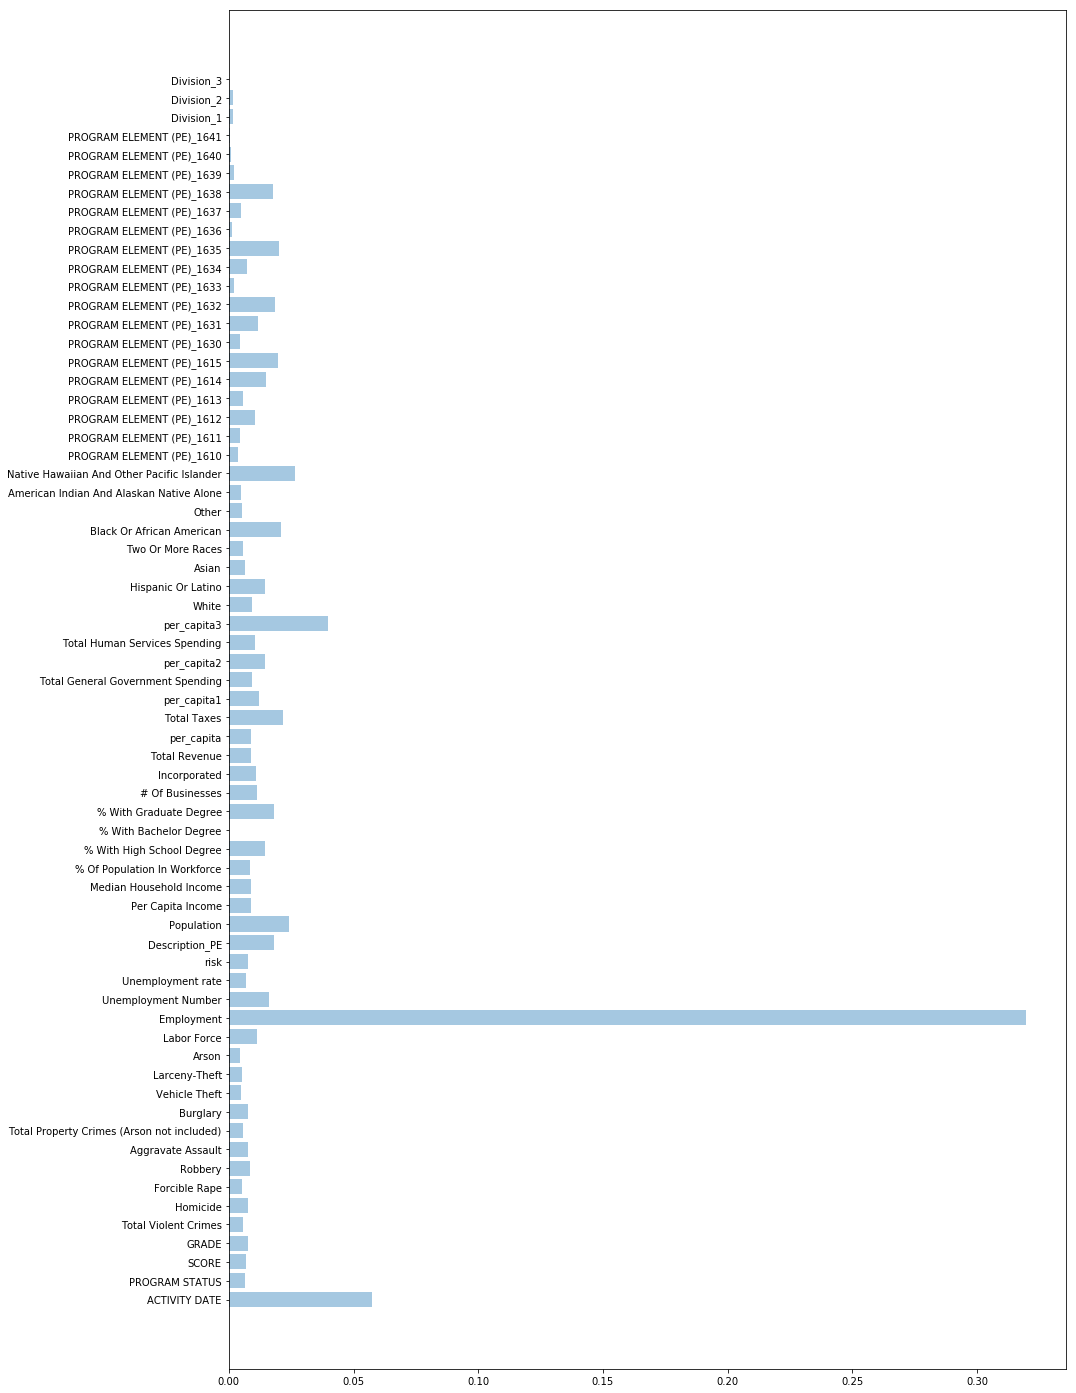

In [64]:
#%matplotlib notebook
features=fin_2016.columns.values
y_list = forest.feature_importances_
y_pos = np.arange(len(y_list))
plt.figure(figsize=(15,25))
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)
plt.show()

# MODEL-2 Regression _ Complete

In [65]:
X=fin2.drop(columns=['SCORE','GRADE','ACTIVITY DATE'],axis=1)
y=fin2['SCORE']

X_train_org,X_test_org, y_train, y_test = train_test_split(X,y, random_state=0)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

forest= RandomForestRegressor(n_estimators=100)
forest.fit(X_train,y_train)

print('Train Score {}'.format(forest.score(X_train,y_train)))
print('Test Score {}'.format(forest.score(X_test,y_test)))

Train Score 0.982822013402674
Test Score 0.8829545352678039


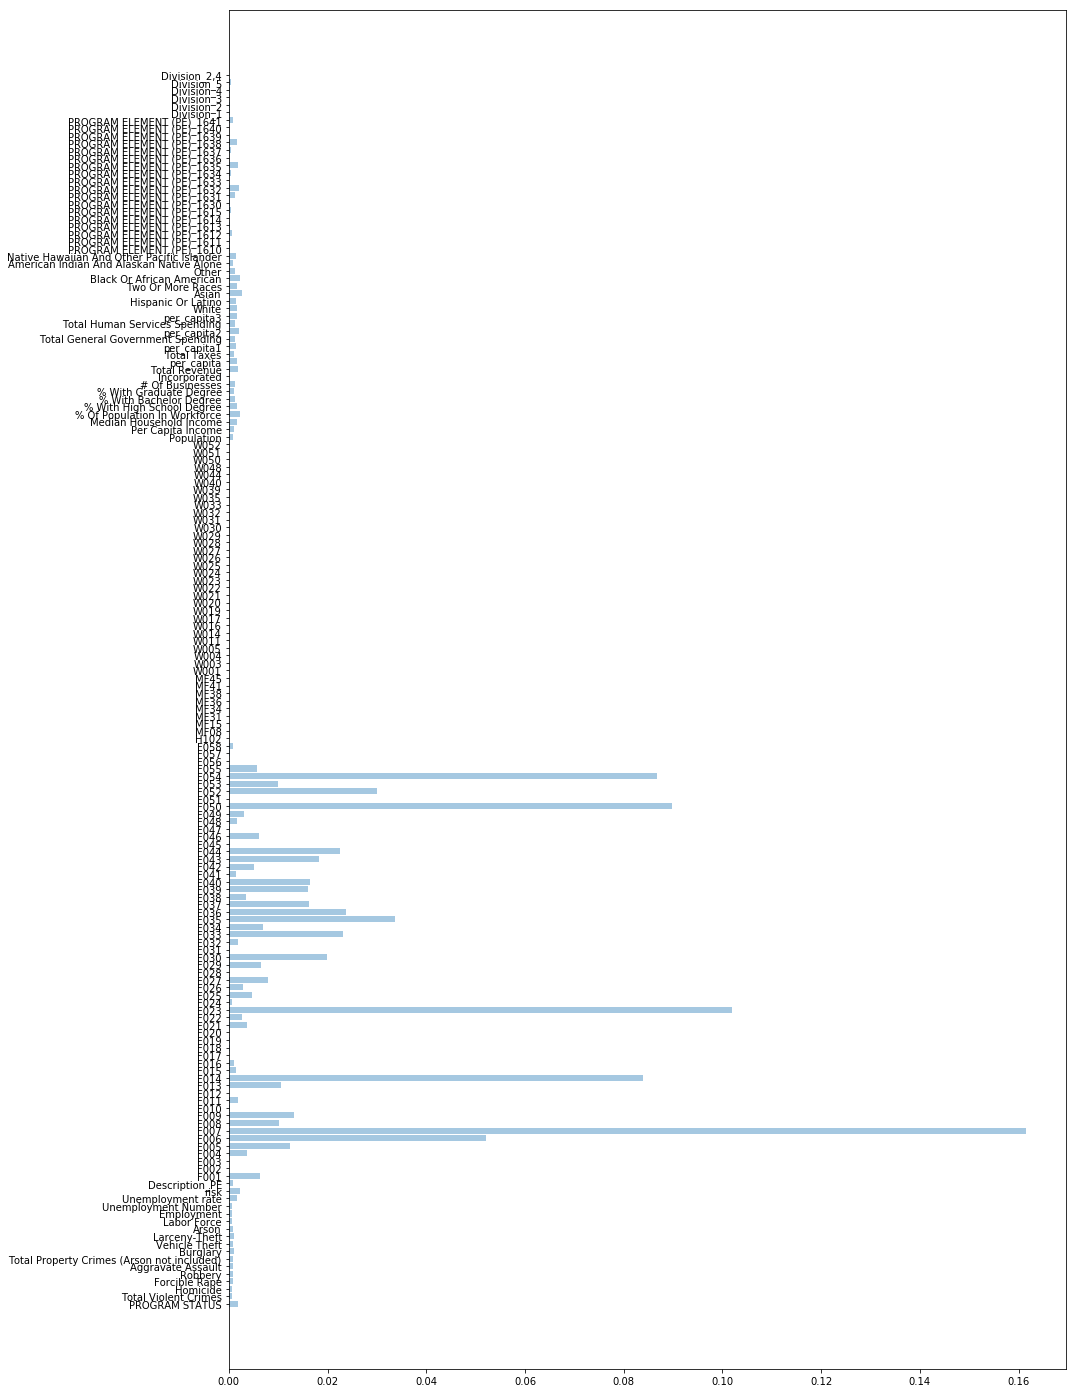

In [549]:
features=X.columns.values
y_list = forest.feature_importances_
y_pos = np.arange(len(y_list))
plt.figure(figsize=(15,25))
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)
plt.show()

## W/O Violations Regression

Train Score 0.14940974309732746
Test Score 0.12453397072988194


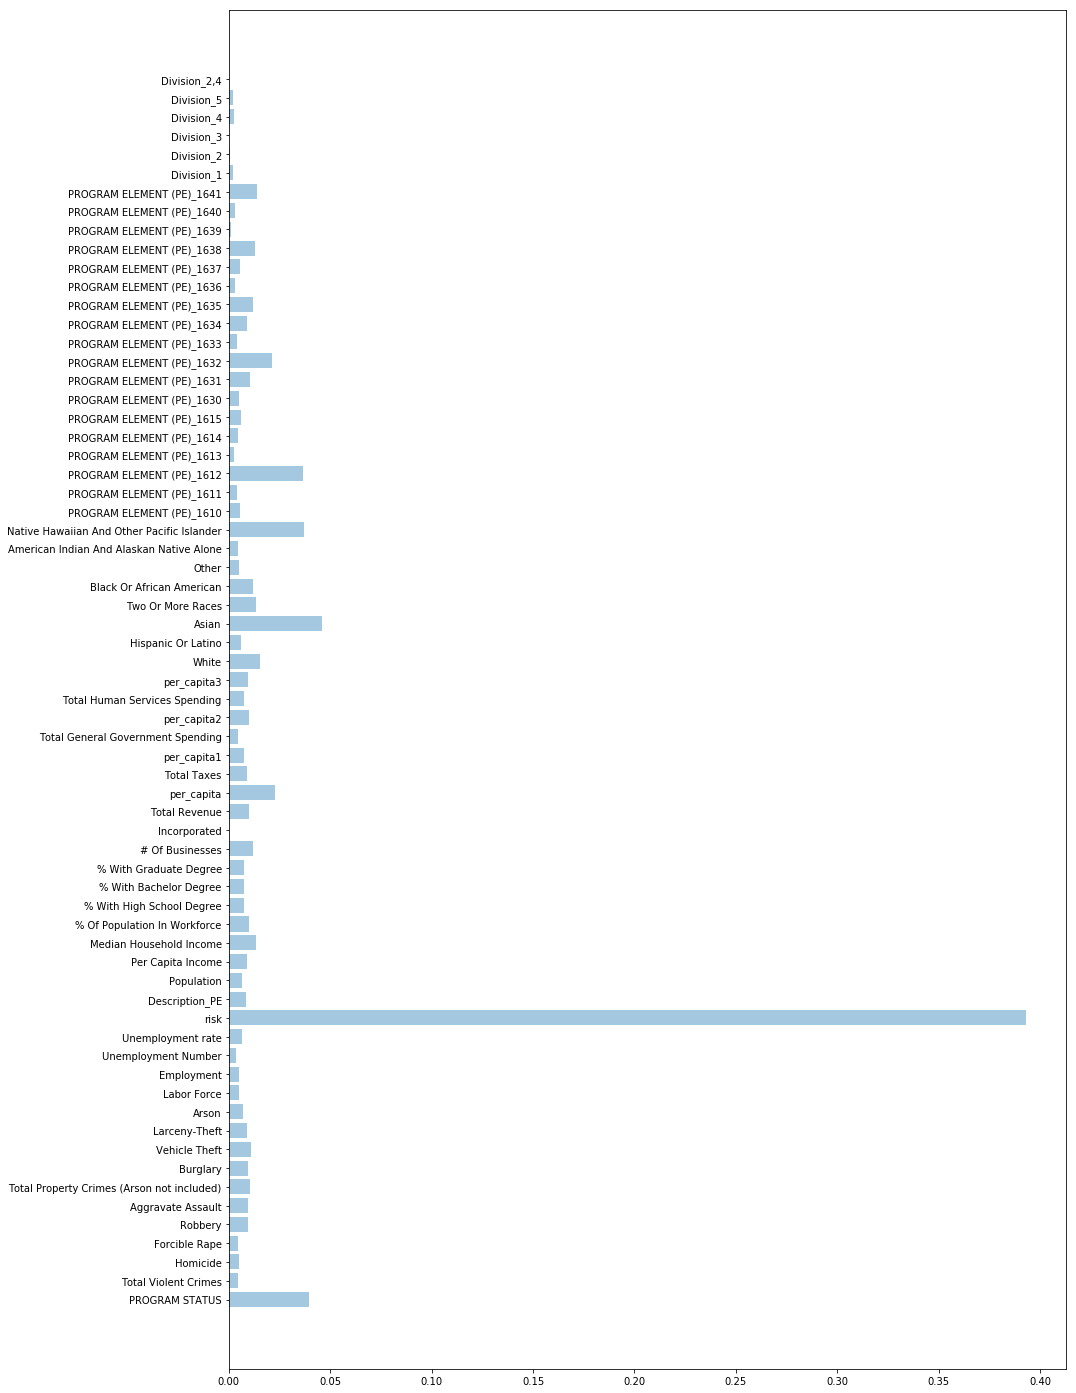

In [542]:
X=fin3.drop(columns=['SCORE','GRADE','ACTIVITY DATE'],axis=1)
y=fin3['SCORE']

X_train_org,X_test_org, y_train, y_test = train_test_split(X,y, random_state=0)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

forest= RandomForestRegressor(n_estimators=100)
forest.fit(X_train,y_train)

print('Train Score {}'.format(forest.score(X_train,y_train)))
print('Test Score {}'.format(forest.score(X_test,y_test)))

features=X.columns.values
y_list = forest.feature_importances_
y_pos = np.arange(len(y_list))
plt.figure(figsize=(15,25))
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)
plt.show()

# Code to create images of Feature importance as given by Random Forest

In [546]:
import plotly.graph_objs as go
import plotly.offline as py
x, y = (list(x) for x in zip(*sorted(zip(forest.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 1000, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ),
    margin=dict(
    l=350,
),
)
fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

In [547]:
py.plot(fig1, filename='plots')

'plots.html'

## Classification with violations

In [535]:
X=fin2.drop(columns=['SCORE','GRADE','ACTIVITY DATE'],axis=1)
y=fin2['GRADE']

X_train_org,X_test_org, y_train, y_test = train_test_split(X,y, random_state=0)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

forest= RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

print('Train Score {}'.format(forest.score(X_train,y_train)))
print('Test Score {}'.format(forest.score(X_test,y_test)))

Train Score 0.999966211650223
Test Score 0.9702245197911915


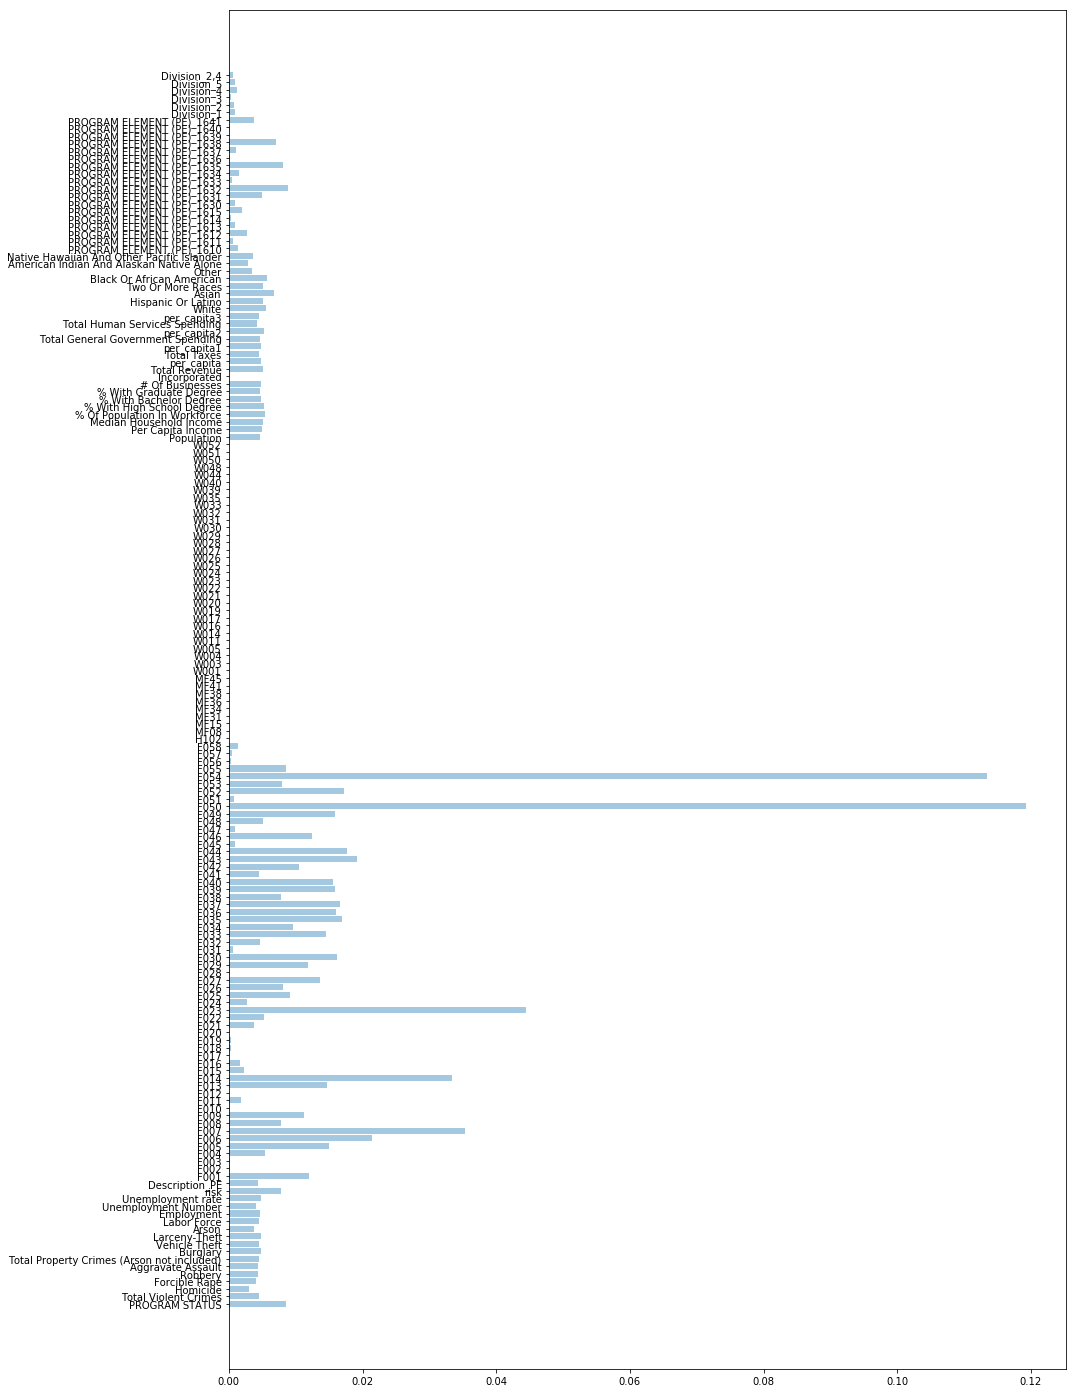

In [537]:
features=X.columns.values
y_list = forest.feature_importances_
y_pos = np.arange(len(y_list))
plt.figure(figsize=(15,25))
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)
plt.show()

## ## Classification without violations

Train Score 0.9441140694688471
Test Score 0.9431098271755106


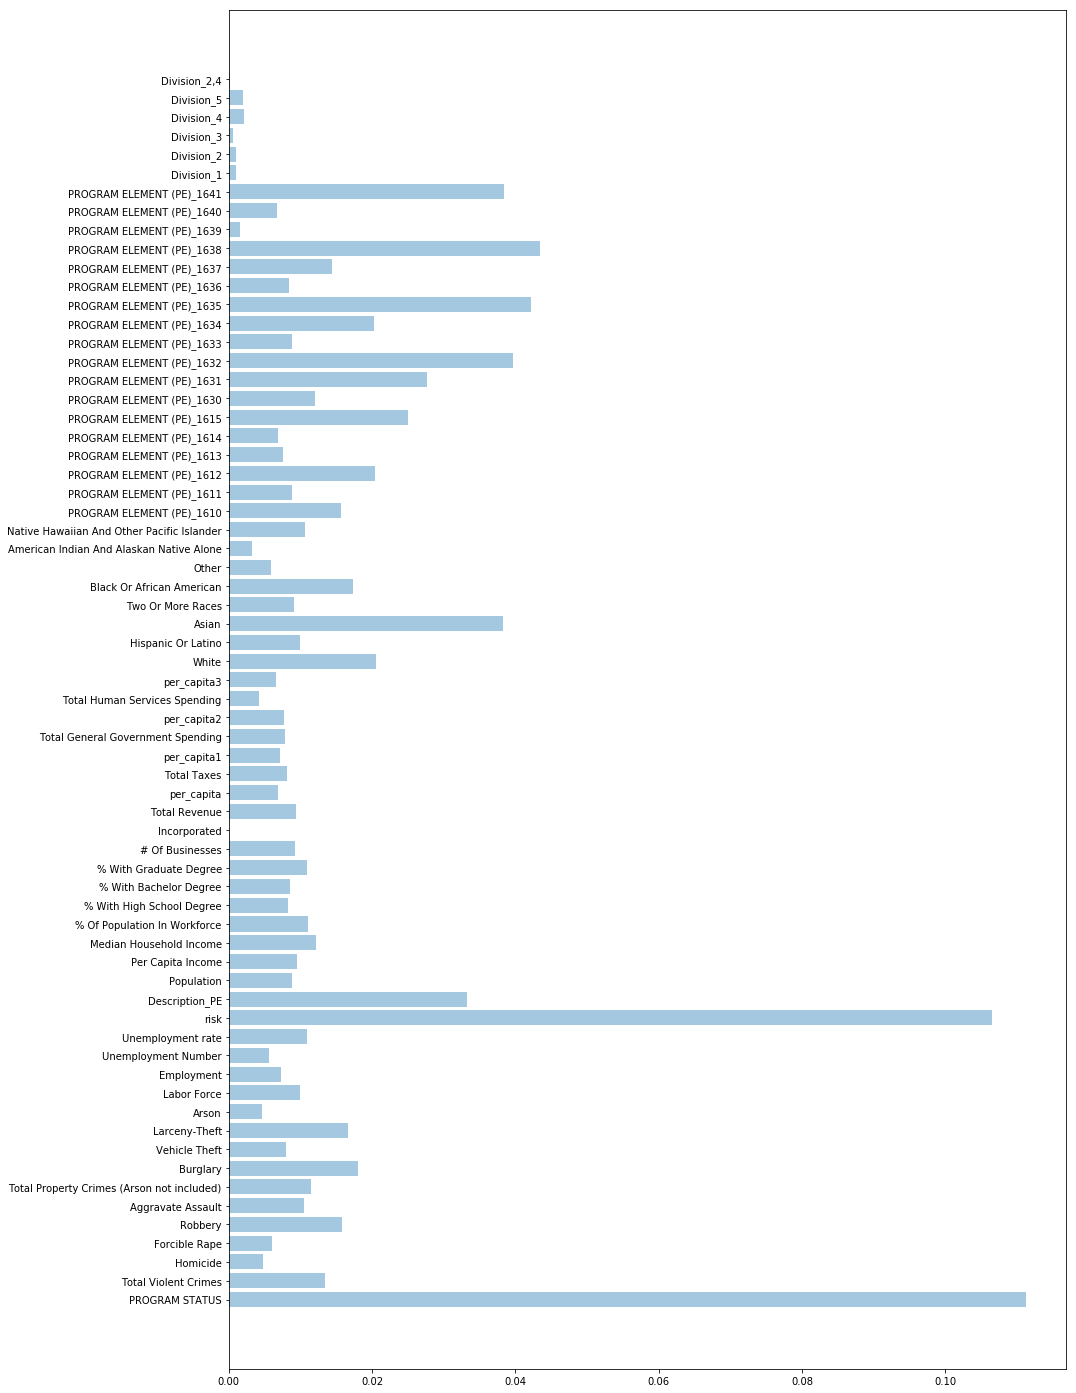

In [545]:
X=fin3.drop(columns=['SCORE','GRADE','ACTIVITY DATE'],axis=1)
y=fin3['GRADE']

X_train_org,X_test_org, y_train, y_test = train_test_split(X,y, random_state=0)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

forest= RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

print('Train Score {}'.format(forest.score(X_train,y_train)))
print('Test Score {}'.format(forest.score(X_test,y_test)))

features=X.columns.values
y_list = forest.feature_importances_
y_pos = np.arange(len(y_list))
plt.figure(figsize=(15,25))
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)
plt.show()

# Regression_2018_without_violations

In [218]:
X=fin_2018.drop(columns=['SCORE','GRADE','ACTIVITY DATE'],axis=1)
y=fin_2018['SCORE']

X_train_org,X_test_org, y_train, y_test = train_test_split(X,y, random_state=0)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

forest= RandomForestRegressor(n_estimators=100)
forest.fit(X_train,y_train)

print('Train Score {}'.format(forest.score(X_train,y_train)))
print('Test Score {}'.format(forest.score(X_test,y_test)))

Train Score 0.1748814226875054
Test Score 0.12328143997991137


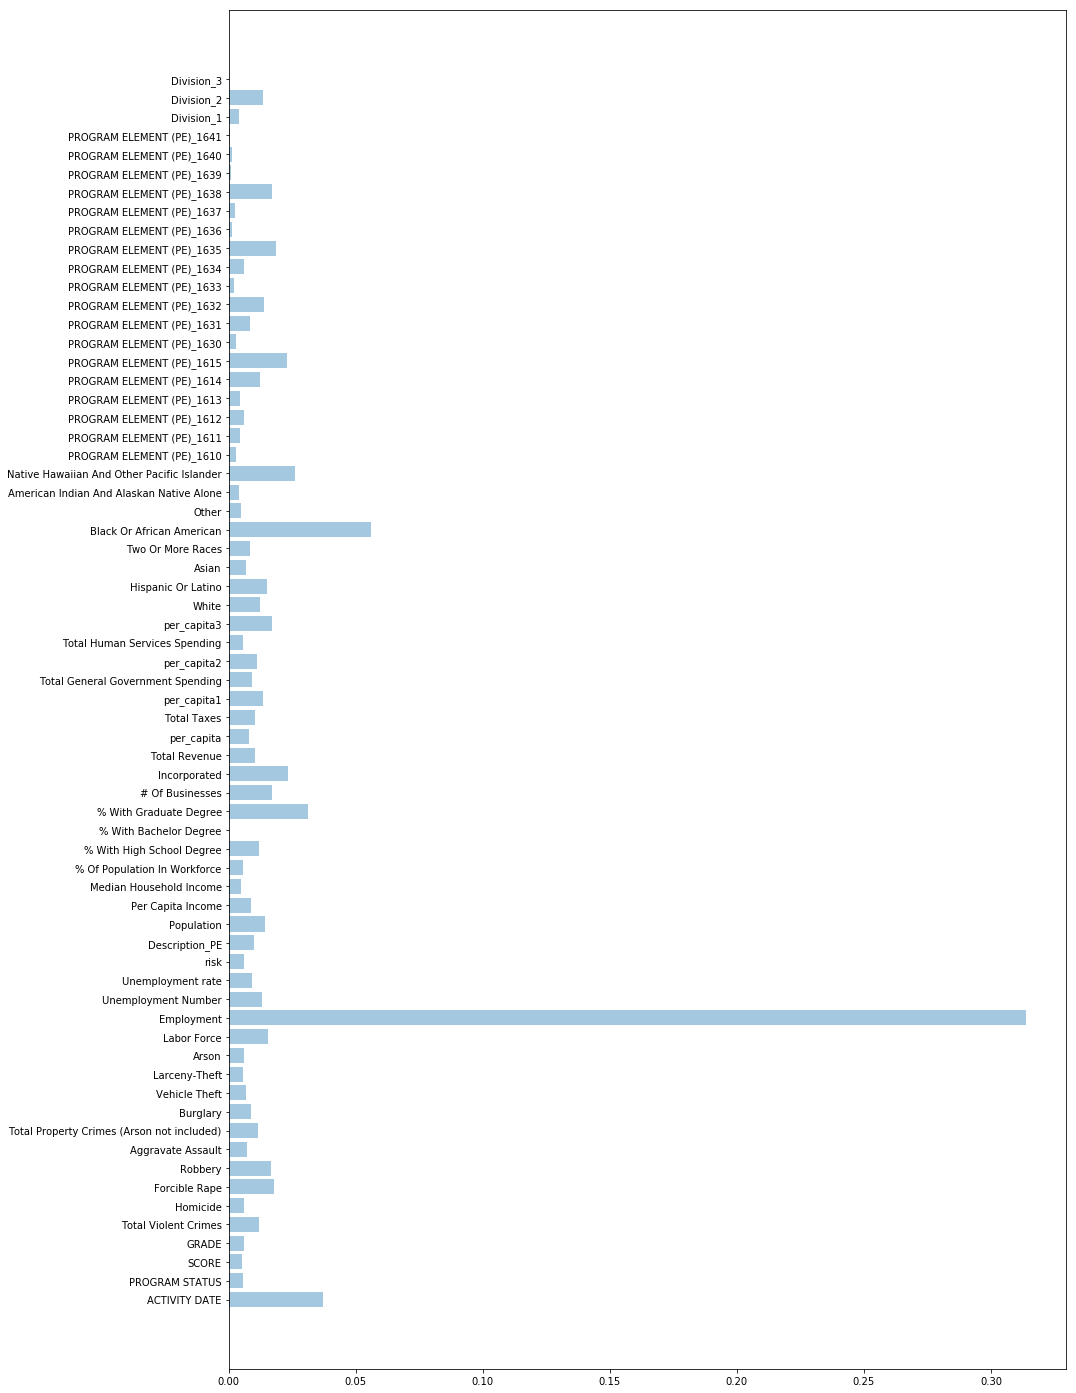

In [219]:
features=fin_2018.columns.values
y_list = forest.feature_importances_
y_pos = np.arange(len(y_list))
plt.figure(figsize=(15,25))
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)
plt.show()

# Regression_complete_without_violations

In [394]:
X=fin3.drop(columns=['SCORE','GRADE','ACTIVITY DATE'],axis=1)
y=fin3['SCORE']

X_train_org,X_test_org, y_train, y_test = train_test_split(X,y, random_state=0)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

forest= RandomForestRegressor(n_estimators=100)
forest.fit(X_train,y_train)

print('Train Score {}'.format(forest.score(X_train,y_train)))
print('Test Score {}'.format(forest.score(X_test,y_test)))

Train Score 0.15060625070511657
Test Score 0.11999275654879216


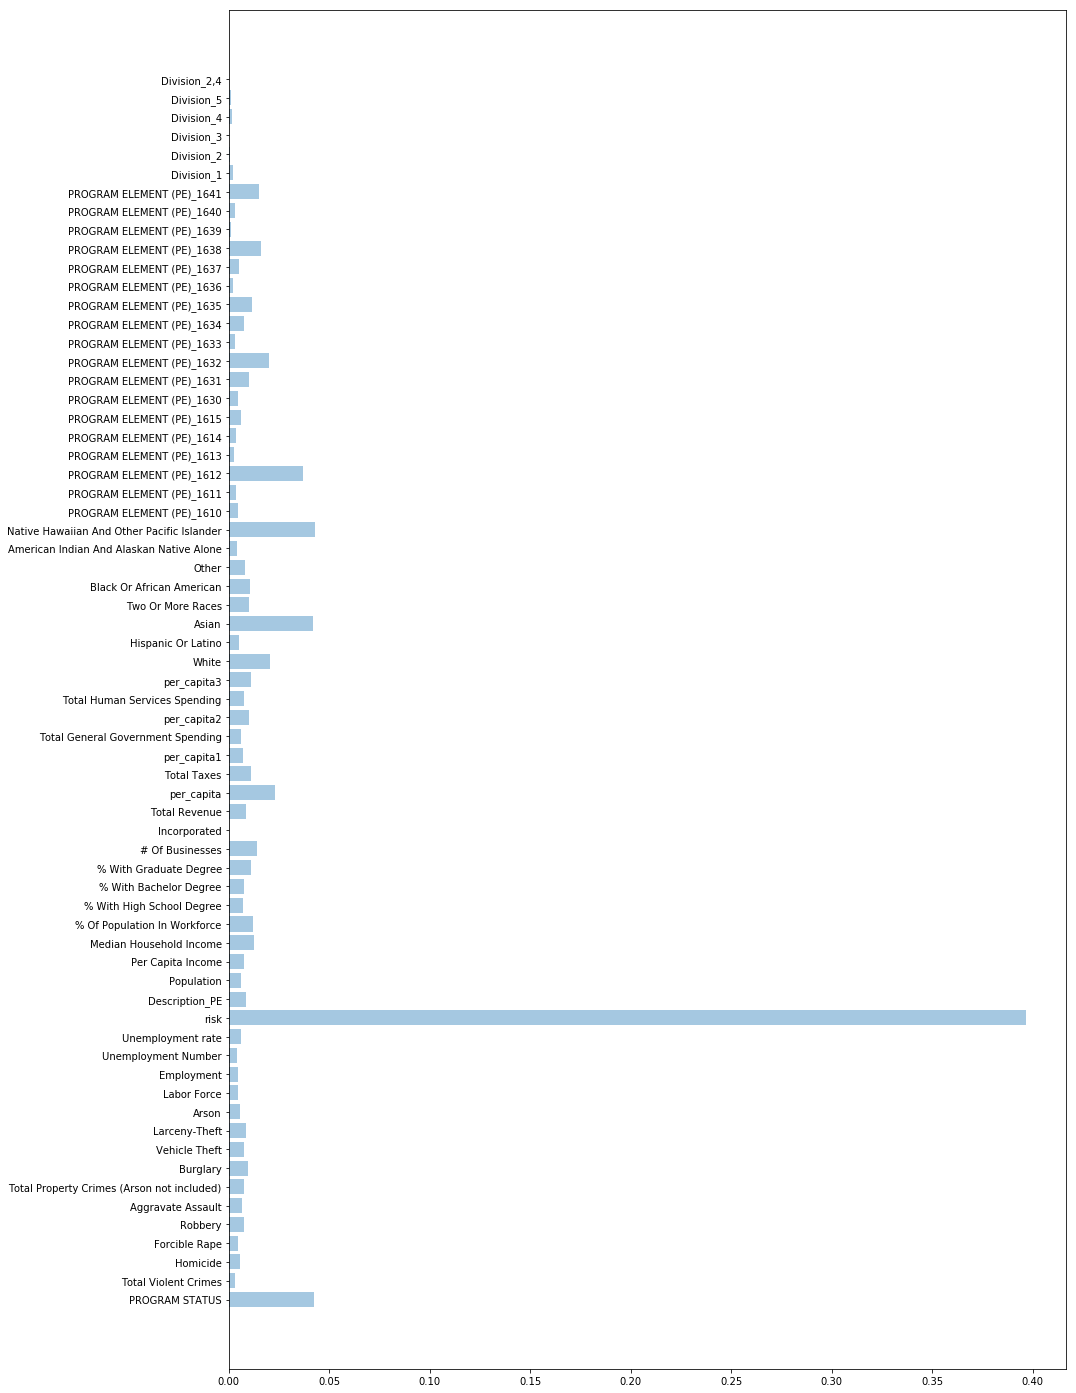

In [395]:
features=X.columns.values
y_list = forest.feature_importances_
y_pos = np.arange(len(y_list))
plt.figure(figsize=(15,25))
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)
plt.show()

# Classification Models

In [428]:
classification=fin2
classification.head()

,ACTIVITY DATE,PROGRAM STATUS,SCORE,GRADE,Total Violent Crimes,Homicide,Forcible Rape,Robbery,Aggravate Assault,Total Property Crimes (Arson not included),Burglary,Vehicle Theft,Larceny-Theft,Arson,Labor Force,Employment,Unemployment Number,Unemployment rate,risk,Description_PE,F001,F002,F003,F004,F005,F006,F007,F008,F009,F010,F011,F012,F013,F014,F015,F016,F017,F018,F019,F020,F021,F022,F023,F024,F025,F026,F027,F028,F029,F030,F031,F032,F033,F034,F035,F036,F037,F038,F039,F040,F041,F042,F043,F044,F045,F046,F047,F048,F049,F050,F051,F052,F053,F054,F055,F056,F057,F058,H102,MF08,MF15,MF31,MF34,MF36,MF38,MF41,MF45,W001,W003,W004,W005,W011,W014,W016,W017,W019,W020,W021,W022,W023,W024,W025,W026,W027,W028,W029,W030,W031,W032,W033,W035,W039,W040,W044,W048,W050,W051,W052,Population,Per Capita Income,Median Household Income,% Of Population In Workforce,% With High School Degree,% With Bachelor Degree,% With Graduate Degree,# Of Businesses,Incorporated,Total Revenue,per_capita,Total Taxes,per_capita1,Total General Government Spending,per_capita2,Total Human Services Spending,per_capita3,White,Hispanic Or Latino,Asian,Two Or More Races,Black Or African American,Other,American Indian And Alaskan Native Alone,Native Hawaiian And Other Pacific Islander,PROGRAM ELEMENT (PE)_1610,PROGRAM ELEMENT (PE)_1611,PROGRAM ELEMENT (PE)_1612,PROGRAM ELEMENT (PE)_1613,PROGRAM ELEMENT (PE)_1614,PROGRAM ELEMENT (PE)_1615,PROGRAM ELEMENT (PE)_1630,PROGRAM ELEMENT (PE)_1631,PROGRAM ELEMENT (PE)_1632,PROGRAM ELEMENT (PE)_1633,PROGRAM ELEMENT (PE)_1634,PROGRAM ELEMENT (PE)_1635,PROGRAM ELEMENT (PE)_1636,PROGRAM ELEMENT (PE)_1637,PROGRAM ELEMENT (PE)_1638,PROGRAM ELEMENT (PE)_1639,PROGRAM ELEMENT (PE)_1640,PROGRAM ELEMENT (PE)_1641,Division_1,Division_2,Division_3,Division_4,Division_5,"Division_2,4"
0,2016,1,91,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2016,1,99,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2016,1,99,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2016,1,94,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2016,1,98,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [429]:
classification['GRADE']=classification['GRADE'].map({'A':3,'B':2,'C':1,'D':0})

In [430]:
classification.head()

,ACTIVITY DATE,PROGRAM STATUS,SCORE,GRADE,Total Violent Crimes,Homicide,Forcible Rape,Robbery,Aggravate Assault,Total Property Crimes (Arson not included),Burglary,Vehicle Theft,Larceny-Theft,Arson,Labor Force,Employment,Unemployment Number,Unemployment rate,risk,Description_PE,F001,F002,F003,F004,F005,F006,F007,F008,F009,F010,F011,F012,F013,F014,F015,F016,F017,F018,F019,F020,F021,F022,F023,F024,F025,F026,F027,F028,F029,F030,F031,F032,F033,F034,F035,F036,F037,F038,F039,F040,F041,F042,F043,F044,F045,F046,F047,F048,F049,F050,F051,F052,F053,F054,F055,F056,F057,F058,H102,MF08,MF15,MF31,MF34,MF36,MF38,MF41,MF45,W001,W003,W004,W005,W011,W014,W016,W017,W019,W020,W021,W022,W023,W024,W025,W026,W027,W028,W029,W030,W031,W032,W033,W035,W039,W040,W044,W048,W050,W051,W052,Population,Per Capita Income,Median Household Income,% Of Population In Workforce,% With High School Degree,% With Bachelor Degree,% With Graduate Degree,# Of Businesses,Incorporated,Total Revenue,per_capita,Total Taxes,per_capita1,Total General Government Spending,per_capita2,Total Human Services Spending,per_capita3,White,Hispanic Or Latino,Asian,Two Or More Races,Black Or African American,Other,American Indian And Alaskan Native Alone,Native Hawaiian And Other Pacific Islander,PROGRAM ELEMENT (PE)_1610,PROGRAM ELEMENT (PE)_1611,PROGRAM ELEMENT (PE)_1612,PROGRAM ELEMENT (PE)_1613,PROGRAM ELEMENT (PE)_1614,PROGRAM ELEMENT (PE)_1615,PROGRAM ELEMENT (PE)_1630,PROGRAM ELEMENT (PE)_1631,PROGRAM ELEMENT (PE)_1632,PROGRAM ELEMENT (PE)_1633,PROGRAM ELEMENT (PE)_1634,PROGRAM ELEMENT (PE)_1635,PROGRAM ELEMENT (PE)_1636,PROGRAM ELEMENT (PE)_1637,PROGRAM ELEMENT (PE)_1638,PROGRAM ELEMENT (PE)_1639,PROGRAM ELEMENT (PE)_1640,PROGRAM ELEMENT (PE)_1641,Division_1,Division_2,Division_3,Division_4,Division_5,"Division_2,4"
0,2016,1,91,3,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2016,1,99,3,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2016,1,99,3,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2016,1,94,3,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2016,1,98,3,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [399]:
classification['GRADE'].unique()

array([3, 2, 1, 0], dtype=int64)

# Classification_complete_without_violations

In [400]:
X=classification.drop(columns=['SCORE','GRADE','ACTIVITY DATE'],axis=1)
y=classification['GRADE']

X_train_org,X_test_org, y_train, y_test = train_test_split(X,y, random_state=0)

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

forest= RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

print('Train Score {}'.format(forest.score(X_train,y_train)))
print('Test Score {}'.format(forest.score(X_test,y_test)))

Train Score 0.9442347477306312
Test Score 0.9412047826527511


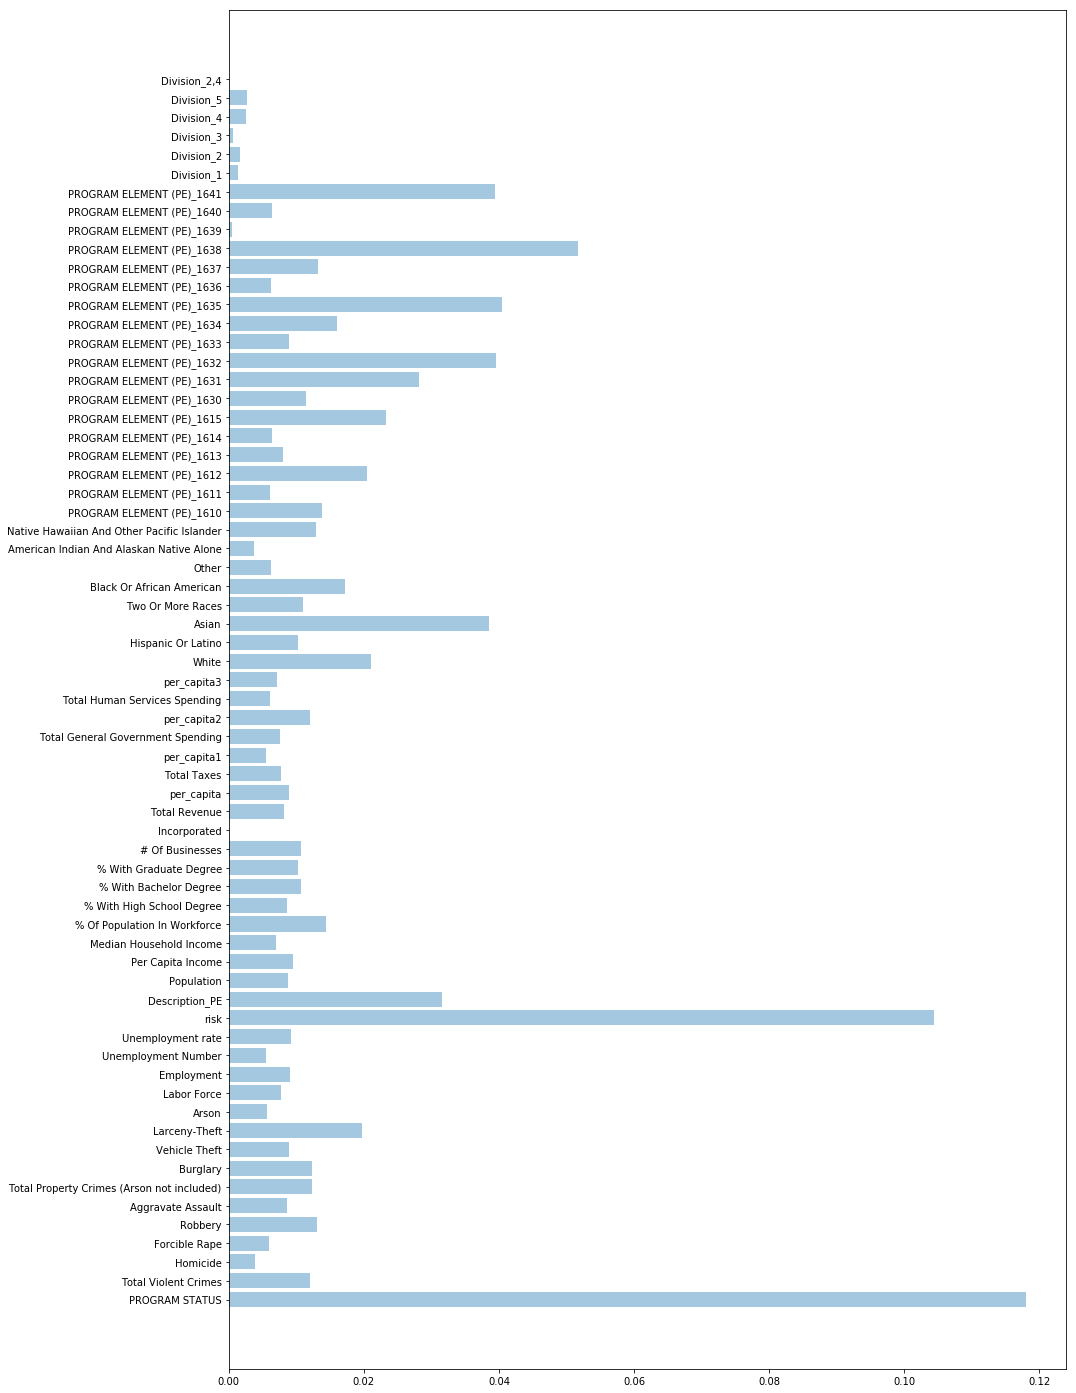

In [401]:
features=X.columns.values
y_list = forest.feature_importances_
y_pos = np.arange(len(y_list))
plt.figure(figsize=(15,25))
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)
plt.show()

# OVERSAMPLING
- Data is highly imbalanced with 90% of A's, we can't beat this accuracy that easily and model will never be able to generalize well. So we are undersampling the data to get a good ratio for Number of A, B and C grade restaurants

In [245]:
X=classification.drop(columns=['SCORE','GRADE','ACTIVITY DATE'],axis=1)
y=classification['GRADE']

X_train_org,X_test_org, y_train, y_test = train_test_split(X,y, random_state=0)


In [244]:
y_train.value_counts()

3    111794
2      6032
1       564
0        35
Name: GRADE, dtype: int64

In [250]:

grade1_index=y_train[y_train.values==1].index
grade2_index=y_train[y_train.values==2].index
grade3_index=y_train[y_train.values==3].index

lower=grade1_index
higher=grade2_index
highest=grade3_index


# remember higher is a list of indexes, either of 0 or 1's in the response variable in training set
higher=np.random.choice(higher, size=2*len(lower))
highest=np.random.choice(highest, size=2*len(lower))

lower=np.asarray(lower)

new_indexes=np.concatenate((lower,higher,highest))

X_train=X_train_org.loc[new_indexes,]
y_train=y_train.loc[new_indexes]

In [252]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

X_train2 = pd.DataFrame(scalar.fit_transform(X_train))
X_test2= pd.DataFrame(scalar.fit_transform(X_test))

#X_train2.columns=X_train.columns.values
#X_test2.columns=X_test.columns.values

#X_train2.index=X_train.index.values
#X_test2.index=X_test.index.values

In [256]:
X_train=X_train2
X_test=X_test2

In [257]:
forest= RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

print('Train Score {}'.format(forest.score(X_train,y_train)))
print('Test Score {}'.format(forest.score(X_test,y_test)))

Train Score 0.6340425531914894
Test Score 0.541012260614044


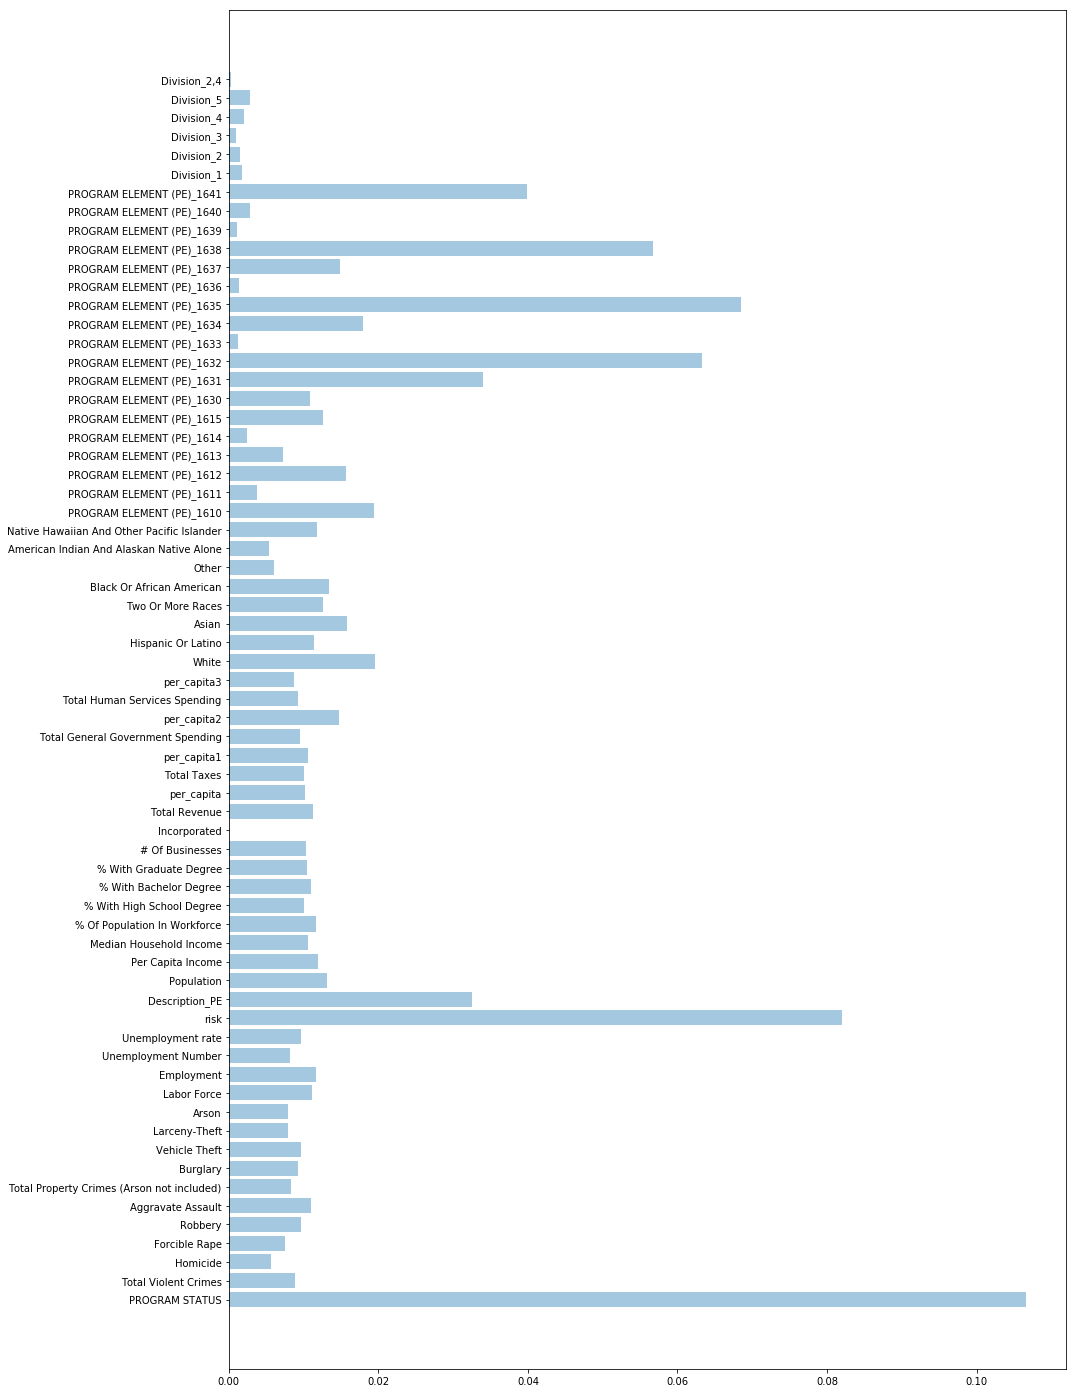

In [259]:

features=X.columns.values
y_list = forest.feature_importances_
y_pos = np.arange(len(y_list))
plt.figure(figsize=(15,25))
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)
plt.show()

# Using Violations

In [402]:
fin2.head()

,ACTIVITY DATE,PROGRAM STATUS,SCORE,GRADE,Total Violent Crimes,Homicide,Forcible Rape,Robbery,Aggravate Assault,Total Property Crimes (Arson not included),Burglary,Vehicle Theft,Larceny-Theft,Arson,Labor Force,Employment,Unemployment Number,Unemployment rate,risk,Description_PE,F001,F002,F003,F004,F005,F006,F007,F008,F009,F010,F011,F012,F013,F014,F015,F016,F017,F018,F019,F020,F021,F022,F023,F024,F025,F026,F027,F028,F029,F030,F031,F032,F033,F034,F035,F036,F037,F038,F039,F040,F041,F042,F043,F044,F045,F046,F047,F048,F049,F050,F051,F052,F053,F054,F055,F056,F057,F058,H102,MF08,MF15,MF31,MF34,MF36,MF38,MF41,MF45,W001,W003,W004,W005,W011,W014,W016,W017,W019,W020,W021,W022,W023,W024,W025,W026,W027,W028,W029,W030,W031,W032,W033,W035,W039,W040,W044,W048,W050,W051,W052,Population,Per Capita Income,Median Household Income,% Of Population In Workforce,% With High School Degree,% With Bachelor Degree,% With Graduate Degree,# Of Businesses,Incorporated,Total Revenue,per_capita,Total Taxes,per_capita1,Total General Government Spending,per_capita2,Total Human Services Spending,per_capita3,White,Hispanic Or Latino,Asian,Two Or More Races,Black Or African American,Other,American Indian And Alaskan Native Alone,Native Hawaiian And Other Pacific Islander,PROGRAM ELEMENT (PE)_1610,PROGRAM ELEMENT (PE)_1611,PROGRAM ELEMENT (PE)_1612,PROGRAM ELEMENT (PE)_1613,PROGRAM ELEMENT (PE)_1614,PROGRAM ELEMENT (PE)_1615,PROGRAM ELEMENT (PE)_1630,PROGRAM ELEMENT (PE)_1631,PROGRAM ELEMENT (PE)_1632,PROGRAM ELEMENT (PE)_1633,PROGRAM ELEMENT (PE)_1634,PROGRAM ELEMENT (PE)_1635,PROGRAM ELEMENT (PE)_1636,PROGRAM ELEMENT (PE)_1637,PROGRAM ELEMENT (PE)_1638,PROGRAM ELEMENT (PE)_1639,PROGRAM ELEMENT (PE)_1640,PROGRAM ELEMENT (PE)_1641,Division_1,Division_2,Division_3,Division_4,Division_5,"Division_2,4"
0,2016,1,91,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2016,1,99,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2016,1,99,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2016,1,94,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2016,1,98,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [450]:
go=fin2
go.head()

,ACTIVITY DATE,PROGRAM STATUS,SCORE,GRADE,Total Violent Crimes,Homicide,Forcible Rape,Robbery,Aggravate Assault,Total Property Crimes (Arson not included),Burglary,Vehicle Theft,Larceny-Theft,Arson,Labor Force,Employment,Unemployment Number,Unemployment rate,risk,Description_PE,F001,F002,F003,F004,F005,F006,F007,F008,F009,F010,F011,F012,F013,F014,F015,F016,F017,F018,F019,F020,F021,F022,F023,F024,F025,F026,F027,F028,F029,F030,F031,F032,F033,F034,F035,F036,F037,F038,F039,F040,F041,F042,F043,F044,F045,F046,F047,F048,F049,F050,F051,F052,F053,F054,F055,F056,F057,F058,H102,MF08,MF15,MF31,MF34,MF36,MF38,MF41,MF45,W001,W003,W004,W005,W011,W014,W016,W017,W019,W020,W021,W022,W023,W024,W025,W026,W027,W028,W029,W030,W031,W032,W033,W035,W039,W040,W044,W048,W050,W051,W052,Population,Per Capita Income,Median Household Income,% Of Population In Workforce,% With High School Degree,% With Bachelor Degree,% With Graduate Degree,# Of Businesses,Incorporated,Total Revenue,per_capita,Total Taxes,per_capita1,Total General Government Spending,per_capita2,Total Human Services Spending,per_capita3,White,Hispanic Or Latino,Asian,Two Or More Races,Black Or African American,Other,American Indian And Alaskan Native Alone,Native Hawaiian And Other Pacific Islander,PROGRAM ELEMENT (PE)_1610,PROGRAM ELEMENT (PE)_1611,PROGRAM ELEMENT (PE)_1612,PROGRAM ELEMENT (PE)_1613,PROGRAM ELEMENT (PE)_1614,PROGRAM ELEMENT (PE)_1615,PROGRAM ELEMENT (PE)_1630,PROGRAM ELEMENT (PE)_1631,PROGRAM ELEMENT (PE)_1632,PROGRAM ELEMENT (PE)_1633,PROGRAM ELEMENT (PE)_1634,PROGRAM ELEMENT (PE)_1635,PROGRAM ELEMENT (PE)_1636,PROGRAM ELEMENT (PE)_1637,PROGRAM ELEMENT (PE)_1638,PROGRAM ELEMENT (PE)_1639,PROGRAM ELEMENT (PE)_1640,PROGRAM ELEMENT (PE)_1641,Division_1,Division_2,Division_3,Division_4,Division_5,"Division_2,4"
0,2016,1,91,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2016,1,99,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2016,1,99,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2016,1,94,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2016,1,98,A,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# CLassification_using_violations_all years

In [451]:
go['GRADE']=go['GRADE'].map({'A':3,'B':2,'C':1,'D':0})

In [331]:
violation['VIOLATION CODE'].unique()

array(['F043', 'F009', 'F030', 'F027', 'F026', 'F006', 'F040', 'F037',
       'F016', 'F052', 'F048', 'F044', 'F025', 'F049', 'F032', 'F008',
       'F011', 'F036', 'F022', 'F001', 'F041', 'F033', 'F023', 'F005',
       'F021', 'F013', 'F031', 'F050', 'F047', 'F014', 'F029', 'F024',
       'F004', 'F039', 'F042', 'F007', 'F035', 'F034', 'F046', 'F038',
       'F018', 'F045', 'F015', 'F019', 'F028', 'F010', 'F017', 'W027',
       'F002', 'F003', 'F012', 'F051', 'W023', 'W044', 'W011', 'W001',
       'W052', 'W014', 'W050', 'W005', 'W003', 'W025', 'W020', 'F053',
       'F054', 'W017', 'W039', 'W026', 'W004', 'W031', 'W016', 'W040',
       'W051', 'W035', 'W019', 'W021', 'W033', 'F055', 'F058', 'W024',
       'W029', 'W048', 'F057', 'H102', 'F056', 'W032', 'W028', 'MF41',
       'MF15', 'MF36', 'MF31', 'MF08', 'MF38', 'MF45', 'MF34', 'W041',
       'W030', 'W022', 'F020'], dtype=object)

In [353]:
fo=go.drop(columns=['F043', 'F009', 'F030', 'F027', 'F026', 'F040', 'F037',
       'F016', 'F052', 'F048', 'F044', 'F025', 'F049', 'F032', 'F008',
       'F011', 'F036', 'F022', 'F001', 'F041', 'F033', 'F005',
       'F021', 'F013', 'F031', 'F047', 'F029', 'F024',
       'F004', 'F039', 'F042', 'F035', 'F034', 'F046', 'F038',
       'F018', 'F045', 'F015', 'F019', 'F028', 'F010', 'F017', 'W027',
       'F002', 'F003', 'F012', 'F051', 'W023', 'W044', 'W011', 'W001',
       'W052', 'W014', 'W050', 'W005', 'W003', 'W025', 'W020', 'F053',
                    'W017', 'W039', 'W026', 'W004', 'W031', 'W016', 'W040',
       'W051', 'W035', 'W019', 'W021', 'W033', 'F055', 'F058', 'W024',
       'W029', 'W048', 'F057', 'H102', 'F056', 'W032', 'W028', 'MF41',
       'MF15', 'MF36', 'MF31', 'MF08', 'MF38', 'MF45', 'MF34',
       'W030', 'W022', 'F020','Incorporated'],axis=1)

In [360]:
go.head()

,ACTIVITY DATE,PROGRAM STATUS,SCORE,GRADE,Total Violent Crimes,Homicide,Forcible Rape,Robbery,Aggravate Assault,Total Property Crimes (Arson not included),Burglary,Vehicle Theft,Larceny-Theft,Arson,Labor Force,Employment,Unemployment Number,Unemployment rate,risk,Description_PE,F001,F002,F003,F004,F005,F006,F007,F008,F009,F010,F011,F012,F013,F014,F015,F016,F017,F018,F019,F020,F021,F022,F023,F024,F025,F026,F027,F028,F029,F030,F031,F032,F033,F034,F035,F036,F037,F038,F039,F040,F041,F042,F043,F044,F045,F046,F047,F048,F049,F050,F051,F052,F053,F054,F055,F056,F057,F058,H102,MF08,MF15,MF31,MF34,MF36,MF38,MF41,MF45,W001,W003,W004,W005,W011,W014,W016,W017,W019,W020,W021,W022,W023,W024,W025,W026,W027,W028,W029,W030,W031,W032,W033,W035,W039,W040,W044,W048,W050,W051,W052,Population,Per Capita Income,Median Household Income,% Of Population In Workforce,% With High School Degree,% With Bachelor Degree,% With Graduate Degree,# Of Businesses,Incorporated,Total Revenue,per_capita,Total Taxes,per_capita1,Total General Government Spending,per_capita2,Total Human Services Spending,per_capita3,White,Hispanic Or Latino,Asian,Two Or More Races,Black Or African American,Other,American Indian And Alaskan Native Alone,Native Hawaiian And Other Pacific Islander,PROGRAM ELEMENT (PE)_1610,PROGRAM ELEMENT (PE)_1611,PROGRAM ELEMENT (PE)_1612,PROGRAM ELEMENT (PE)_1613,PROGRAM ELEMENT (PE)_1614,PROGRAM ELEMENT (PE)_1615,PROGRAM ELEMENT (PE)_1630,PROGRAM ELEMENT (PE)_1631,PROGRAM ELEMENT (PE)_1632,PROGRAM ELEMENT (PE)_1633,PROGRAM ELEMENT (PE)_1634,PROGRAM ELEMENT (PE)_1635,PROGRAM ELEMENT (PE)_1636,PROGRAM ELEMENT (PE)_1637,PROGRAM ELEMENT (PE)_1638,PROGRAM ELEMENT (PE)_1639,PROGRAM ELEMENT (PE)_1640,PROGRAM ELEMENT (PE)_1641,Division_1,Division_2,Division_3,Division_4,Division_5,"Division_2,4"
0,2016,1,91,3,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2016,1,99,3,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2016,1,99,3,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2016,1,94,3,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39353.0,45792.0,79292.0,0.701,0.116,0.317,0.222,2157.0,1,142223843.0,3610.0,41445869.0,2377.0,34840437,884,298136.0,7.57,48.8,22.9,15.5,3.9,7.8,0.9,0.1,0.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2016,1,98,3,213.0,0.0,3.0,137.0,73.0,1886.0,208.0,108.0,1570.0,1.0,23400.0,22500.0,800.0,0.035,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [361]:
violation['VIOLATION CODE'].unique()

array(['F043', 'F009', 'F030', 'F027', 'F026', 'F006', 'F040', 'F037',
       'F016', 'F052', 'F048', 'F044', 'F025', 'F049', 'F032', 'F008',
       'F011', 'F036', 'F022', 'F001', 'F041', 'F033', 'F023', 'F005',
       'F021', 'F013', 'F031', 'F050', 'F047', 'F014', 'F029', 'F024',
       'F004', 'F039', 'F042', 'F007', 'F035', 'F034', 'F046', 'F038',
       'F018', 'F045', 'F015', 'F019', 'F028', 'F010', 'F017', 'W027',
       'F002', 'F003', 'F012', 'F051', 'W023', 'W044', 'W011', 'W001',
       'W052', 'W014', 'W050', 'W005', 'W003', 'W025', 'W020', 'F053',
       'F054', 'W017', 'W039', 'W026', 'W004', 'W031', 'W016', 'W040',
       'W051', 'W035', 'W019', 'W021', 'W033', 'F055', 'F058', 'W024',
       'W029', 'W048', 'F057', 'H102', 'F056', 'W032', 'W028', 'MF41',
       'MF15', 'MF36', 'MF31', 'MF08', 'MF38', 'MF45', 'MF34', 'W041',
       'W030', 'W022', 'F020'], dtype=object)

In [365]:
moo=go[['SCORE','GRADE','F043', 'F009', 'F030', 'F027', 'F026', 'F006', 'F040', 'F037',
       'F016', 'F052', 'F048', 'F044', 'F025', 'F049', 'F032', 'F008',
       'F011', 'F036', 'F022', 'F001', 'F041', 'F033', 'F023', 'F005',
       'F021', 'F013', 'F031', 'F050', 'F047', 'F014', 'F029', 'F024',
       'F004', 'F039', 'F042', 'F007', 'F035', 'F034', 'F046', 'F038',
       'F018', 'F045', 'F015', 'F019', 'F028', 'F010', 'F017', 'W027',
       'F002', 'F003', 'F012', 'F051', 'W023', 'W044', 'W011', 'W001',
       'W052', 'W014', 'W050', 'W005', 'W003', 'W025', 'W020', 'F053',
       'F054', 'W017', 'W039', 'W026', 'W004', 'W031', 'W016', 'W040',
       'W051', 'W035', 'W019', 'W021', 'W033', 'F055', 'F058', 'W024',
       'W029', 'W048', 'F057', 'H102', 'F056', 'W032', 'W028', 'MF41',
       'MF15', 'MF36', 'MF31', 'MF08', 'MF38', 'MF45', 'MF34',
       'W030', 'W022', 'F020']]

In [ ]:
-some other model

In [460]:
X=go.drop(columns=['GRADE','SCORE','ACTIVITY DATE'],axis=1)
y=go['GRADE']

X_train_org,X_test_org, y_train, y_test = train_test_split(X,y, random_state=0)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

forest= RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

print('Train Score {}'.format(forest.score(X_train,y_train)))
print('Test Score {}'.format(forest.score(X_test,y_test)))

Train Score 0.999974667511083
Test Score 0.9709190394163543


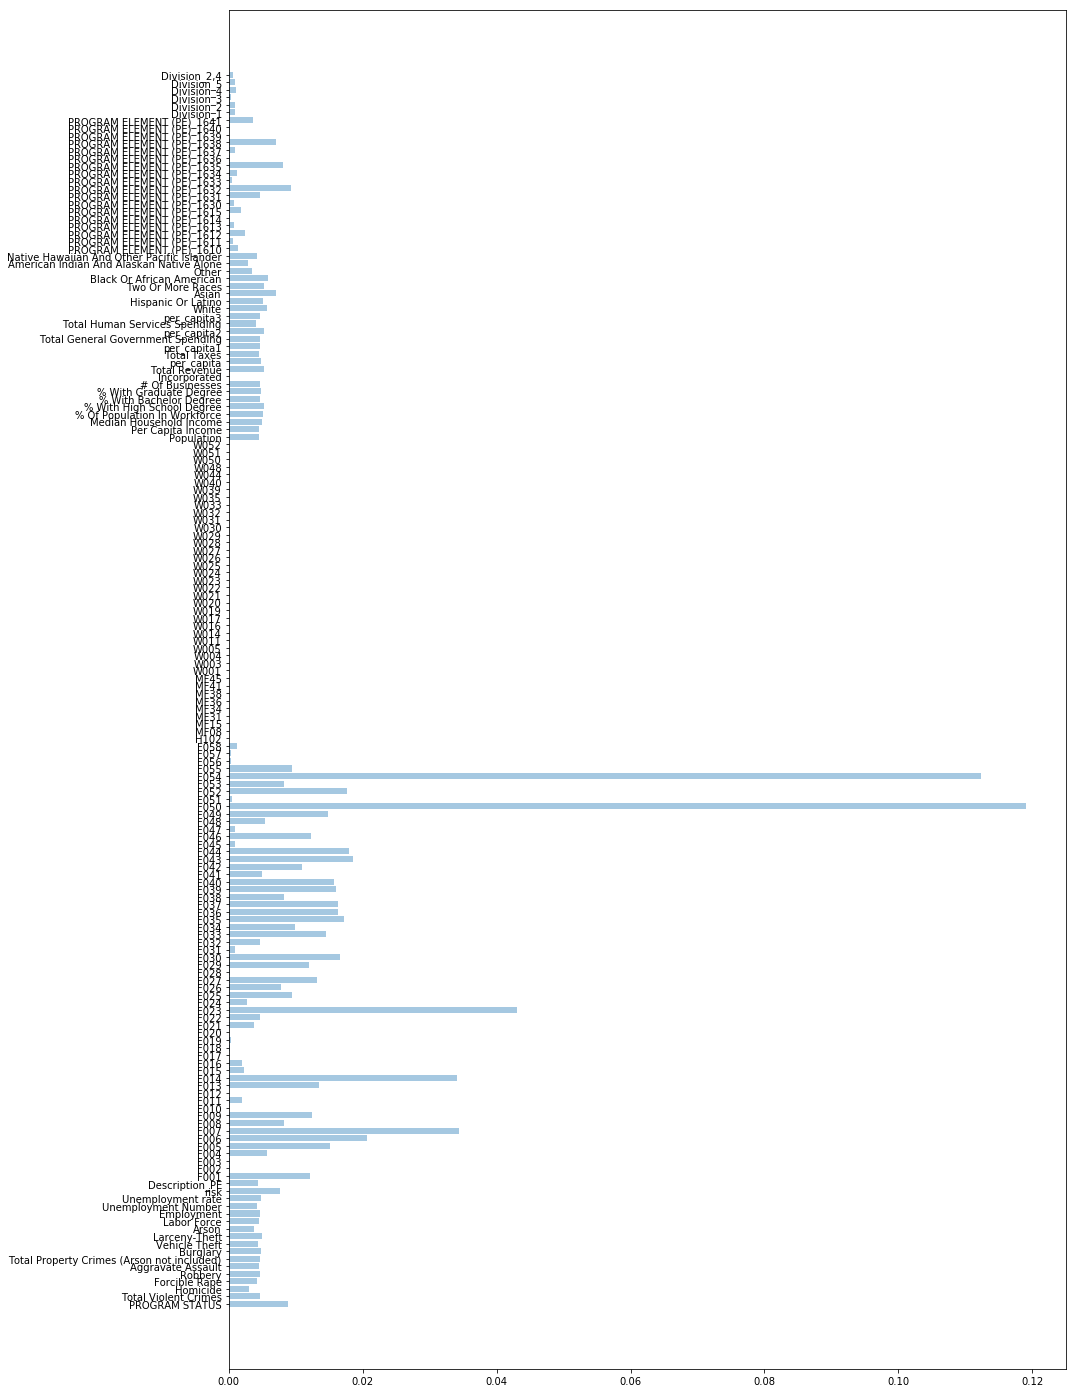

In [461]:
features=X.columns.values
y_list = forest.feature_importances_
y_pos = np.arange(len(y_list))
plt.figure(figsize=(15,25))
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)
plt.show()

In [466]:
from sklearn.metrics import confusion_matrix, classification_report

In [467]:
dtc_pred=forest.predict(X_test)
conf_mat = confusion_matrix(y_test,dtc_pred)
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.58      0.08      0.14       183
           2       0.85      0.56      0.68      2105
           3       0.98      1.00      0.99     37168

   micro avg       0.97      0.97      0.97     39476
   macro avg       0.60      0.41      0.45     39476
weighted avg       0.97      0.97      0.97     39476



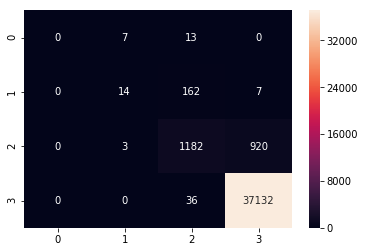

In [469]:
sns.heatmap(conf_mat, annot=True,fmt='g')


In [441]:
import plotly.graph_objs as go
import plotly.offline as py
x, y = (list(x) for x in zip(*sorted(zip(forest.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ),
    margin=dict(
    l=300,
),
)
fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

In [442]:
py.plot(fig1, filename='plots')

'plots.html'

In [419]:
import plotly

In [418]:
!pip install plotly

  Stored in directory: C:\Users\nick2\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [384]:
violation[violation['VIOLATION CODE']=='F006']

,SERIAL NUMBER,VIOLATION STATUS,VIOLATION CODE,VIOLATION DESCRIPTION,POINTS
282,DAF5YLNNO,OUT OF COMPLIANCE,F006,# 06. Adequate handwashing facilities supplied...,2.0
283,DATNJVDTJ,OUT OF COMPLIANCE,F006,# 06. Adequate handwashing facilities supplied...,2.0
284,DANWZDMB7,OUT OF COMPLIANCE,F006,# 06. Adequate handwashing facilities supplied...,2.0
285,DAWLU2C4Y,OUT OF COMPLIANCE,F006,# 06. Adequate handwashing facilities supplied...,2.0
286,DAOZM7SCS,OUT OF COMPLIANCE,F006,# 06. Adequate handwashing facilities supplied...,2.0
287,DAY9OZMTA,OUT OF COMPLIANCE,F006,# 06. Adequate handwashing facilities supplied...,2.0
288,DATTASPEP,OUT OF COMPLIANCE,F006,# 06. Adequate handwashing facilities supplied...,2.0
289,DAOLG6XV7,OUT OF COMPLIANCE,F006,# 06. Adequate handwashing facilities supplied...,2.0
290,DAGRXVWSO,OUT OF COMPLIANCE,F006,# 06. Adequate handwashing facilities supplied...,2.0
291,DASCUYXWT,OUT OF COMPLIANCE,F006,# 06. Adequate handwashing facilities supplied...,2.0


In [ ]:
--Question-3 on moo data

In [375]:
X=moo.drop(columns=['SCORE','GRADE'],axis=1)
y=moo['SCORE']

X_train_org,X_test_org, y_train, y_test = train_test_split(X,y, random_state=0)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

forest= RandomForestRegressor(n_estimators=100)
forest.fit(X_train,y_train)

print('Train Score {}'.format(forest.score(X_train,y_train)))
print('Test Score {}'.format(forest.score(X_test,y_test)))

Train Score 0.977558963477101
Test Score 0.8964030456366152


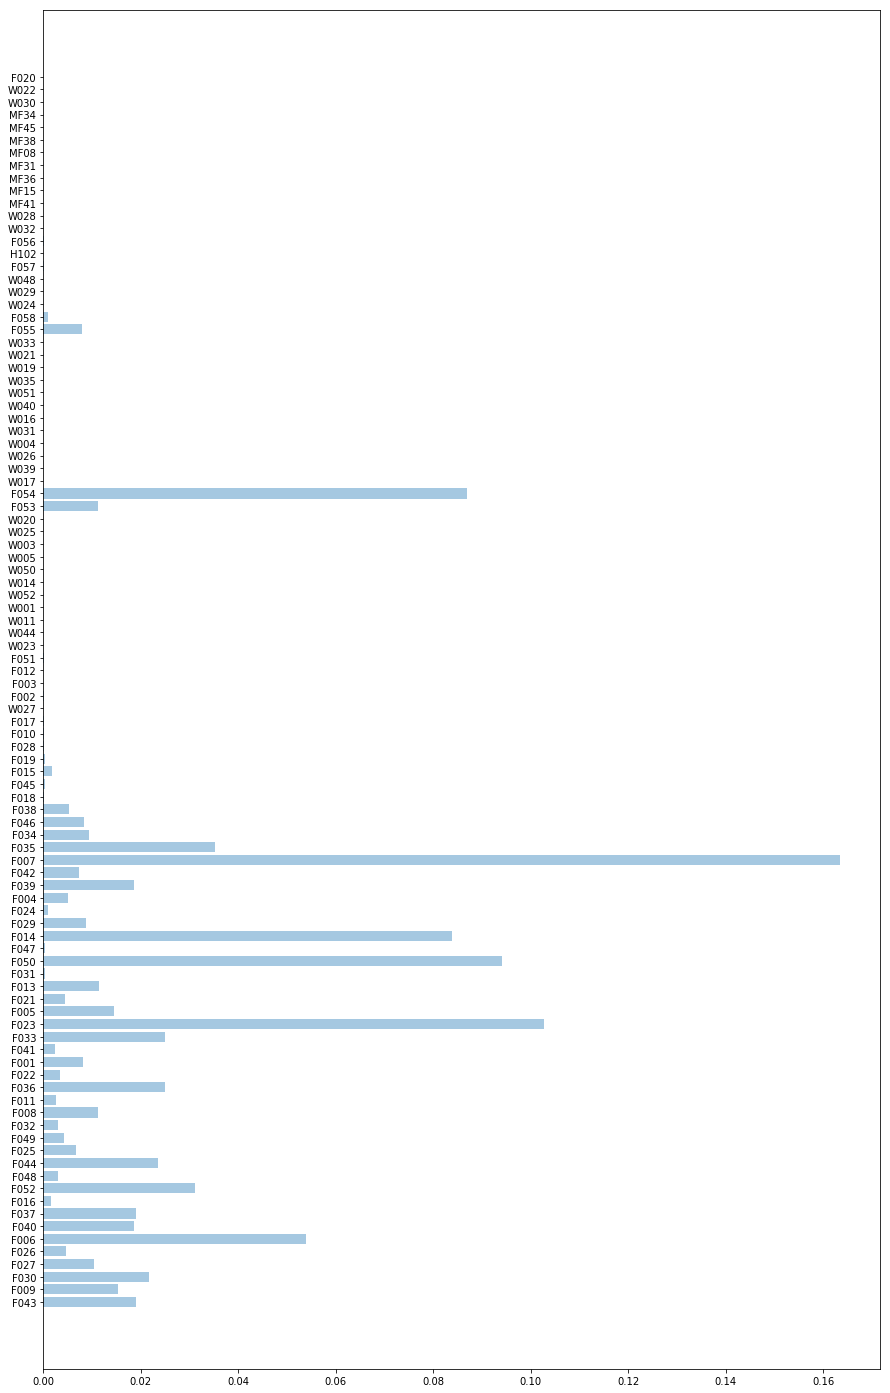

In [376]:
features=X.columns.values
y_list = forest.feature_importances_
y_pos = np.arange(len(y_list))
plt.figure(figsize=(15,25))
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)
plt.show()

In [377]:
dd=pd.DataFrame(y_list,features)
dd
dd=dd.sort_values(by=0)
dd*100

,0
F020,0.000000e+00
W022,0.000000e+00
W044,0.000000e+00
W011,0.000000e+00
W014,0.000000e+00
W003,0.000000e+00
W025,0.000000e+00
W004,0.000000e+00
W035,0.000000e+00
W019,0.000000e+00


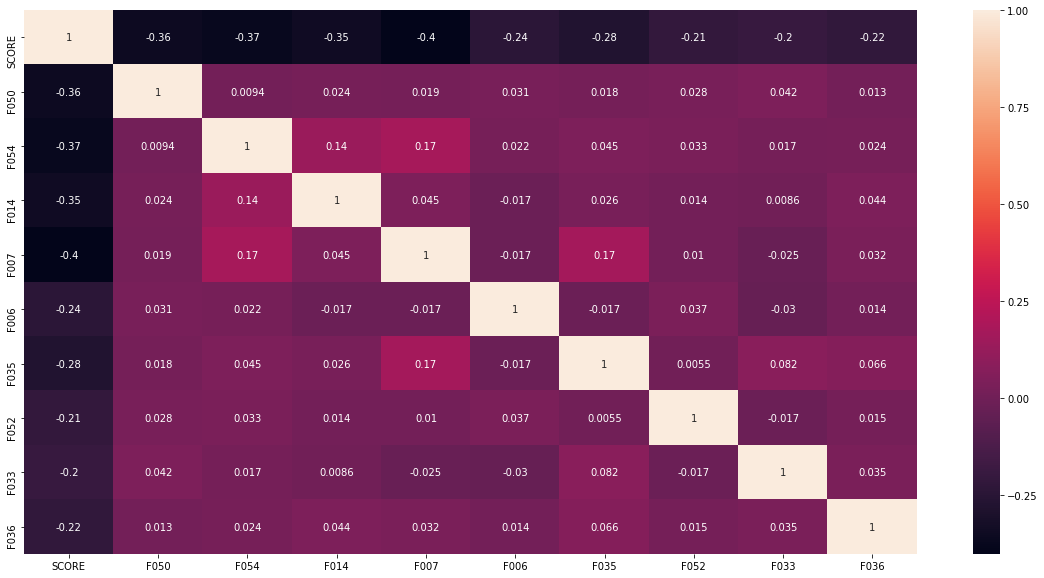

In [378]:
correlation1=moo[['SCORE','F050','F054','F014','F007','F006','F035','F052','F033','F036']]
plt.figure(figsize=(20,10)) 
sns.heatmap(correlation1.corr(), annot=True) 

In [369]:
X=moo.drop(columns=['SCORE','GRADE'],axis=1)
y=moo['GRADE']

X_train_org,X_test_org, y_train, y_test = train_test_split(X,y, random_state=0)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

forest= RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

print('Train Score {}'.format(forest.score(X_train,y_train)))
print('Test Score {}'.format(forest.score(X_test,y_test)))

Train Score 0.9995777918513827
Test Score 0.9751241260512716


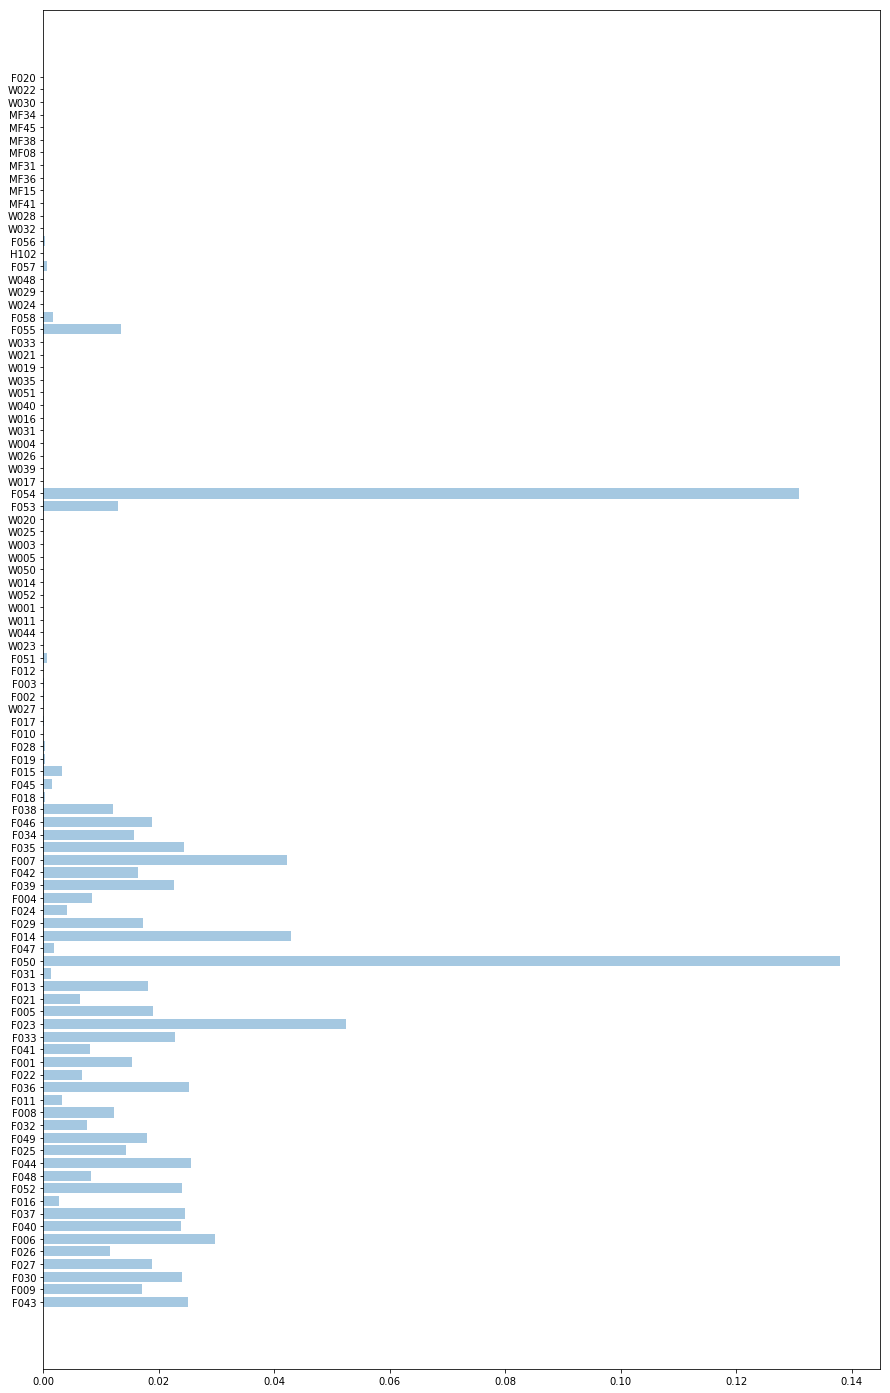

In [370]:
features=X.columns.values
y_list = forest.feature_importances_
y_pos = np.arange(len(y_list))
plt.figure(figsize=(15,25))
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)
plt.show()

In [371]:
dd=pd.DataFrame(y_list,features)
dd
dd=dd.sort_values(by=0)
dd*100

,0
F020,0.000000e+00
W022,0.000000e+00
W044,0.000000e+00
W011,0.000000e+00
W025,0.000000e+00
W020,0.000000e+00
W039,0.000000e+00
W004,0.000000e+00
W040,0.000000e+00
W035,0.000000e+00


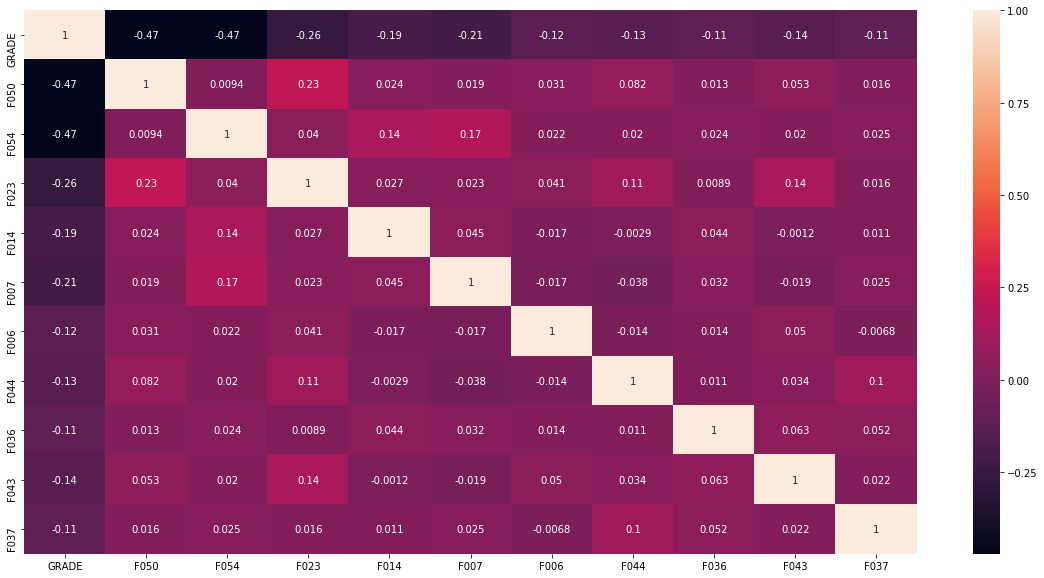

In [374]:
correlation1=moo[['GRADE','F050','F054','F023','F014','F007','F006','F044','F036','F043','F037']]
plt.figure(figsize=(20,10)) 
sns.heatmap(correlation1.corr(), annot=True) 

In [380]:
violation[violation['VIOLATION CODE']=='F050']

,SERIAL NUMBER,VIOLATION STATUS,VIOLATION CODE,VIOLATION DESCRIPTION,POINTS
1367,DA3OLEJV0,OUT OF COMPLIANCE,F050,# 51. Permit Suspension,0.0
1371,DAP2MW64E,OUT OF COMPLIANCE,F050,# 51. Permit Suspension,0.0
1372,DASYBSCR2,OUT OF COMPLIANCE,F050,# 51. Permit Suspension,0.0
1373,DAKDR1KYF,OUT OF COMPLIANCE,F050,# 51. Permit Suspension,0.0
1375,DAC19TN7W,OUT OF COMPLIANCE,F050,# 51. Permit Suspension,0.0
3248,DASUKEUKW,OUT OF COMPLIANCE,F050,# 51. Permit Suspension,0.0
3249,DAA2GRTFV,OUT OF COMPLIANCE,F050,# 51. Permit Suspension,0.0
3250,DAFK33O0M,OUT OF COMPLIANCE,F050,# 51. Permit Suspension,0.0
3251,DAHRLJHP9,OUT OF COMPLIANCE,F050,# 51. Permit Suspension,0.0
4522,DAOFZZIBG,OUT OF COMPLIANCE,F050,# 51. Permit Suspension,0.0


In [ ]:
------

In [405]:
go['GRADE']=go['GRADE'].map({'A':3,'B':2,'C':1,'D':0})

In [414]:
X=go.drop(columns=['SCORE','GRADE','ACTIVITY DATE'],axis=1)
y=go['GRADE']

X_train_org,X_test_org, y_train, y_test = train_test_split(X,y, random_state=0)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

forest= RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

print('Train Score {}'.format(forest.score(X_train,y_train)))
print('Test Score {}'.format(forest.score(X_test,y_test)))

Train Score 0.999974667511083
Test Score 0.9712230215827338


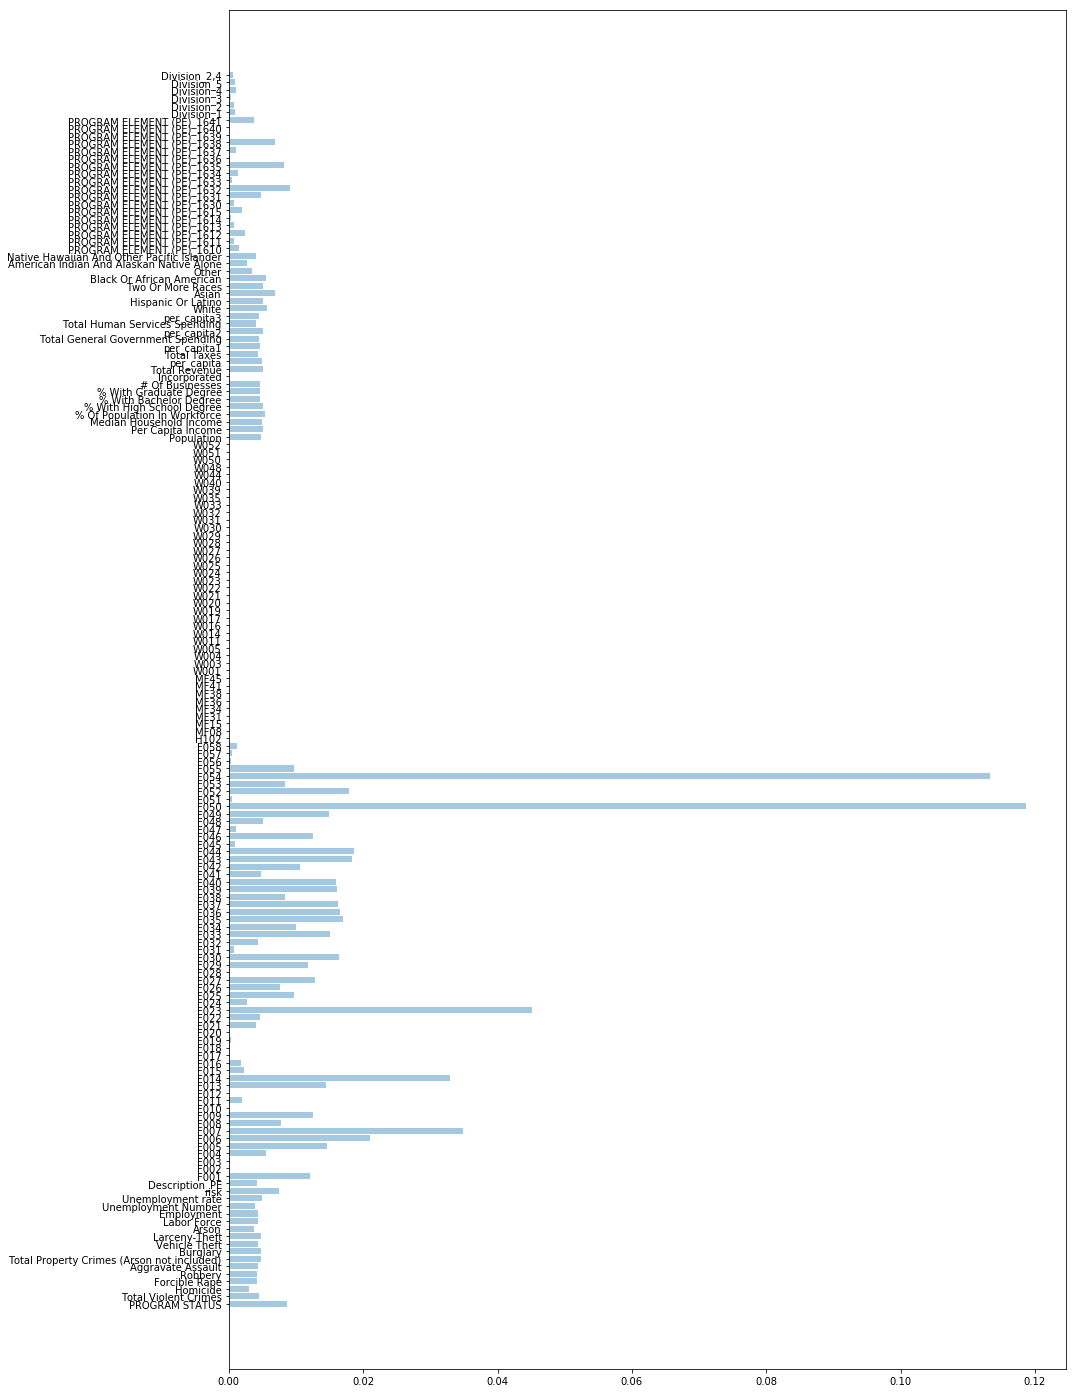

In [415]:
features=X.columns.values
y_list = forest.feature_importances_
y_pos = np.arange(len(y_list))
plt.figure(figsize=(15,25))
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)
plt.show()

# Best Parameters

In [ ]:
forest= RandomForestRegressor()
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[5,10,20,50,100], 'n_estimators':[20,50,100,200,500]}

grid_search = GridSearchCV(forest,parameters,cv=10,return_train_score=True)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best Accuracy is {}'.format(best_accuracy))
print('Best Parameters {}'.format(best_parameters))


results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
plt.title('Mean Test Validation Score')
mglearn.tools.heatmap(scores, xlabel='max_depth', xticklabels=parameters['max_depth'], ylabel='n_estimators', yticklabels=parameters['n_estimators'], cmap="viridis")



# DESCRIPTIVE

In [241]:
violation['VIOLATION DESCRIPTION'][300]

'# 06. Adequate handwashing facilities supplied & accessible'

In [251]:
codes=violation['VIOLATION CODE'].unique()

In [256]:
x=pd.DataFrame(np.array([[2, 3]]), columns=['Description', 'Points Deducted'])

In [257]:
x

,Description,Points Deducted
0,2,3


In [259]:
for i in codes:
    x.append(pd.DataFrame(violation[violation['VIOLATION CODE']==i]['VIOLATION DESCRIPTION']))

In [250]:
x

,VIOLATION DESCRIPTION
927591,# 20. Licensed health care facilities/public &...


In [255]:
violation[violation['VIOLATION CODE'].isin(violation['VIOLATION CODE'].unique())]

,SERIAL NUMBER,VIOLATION STATUS,VIOLATION CODE,VIOLATION DESCRIPTION,POINTS
0,DAGRXVWSO,OUT OF COMPLIANCE,F043,# 43. Premises; personal/cleaning items; vermi...,1.0
1,DAYUDBQIK,OUT OF COMPLIANCE,F043,# 43. Premises; personal/cleaning items; vermi...,1.0
2,DASDXDAHG,OUT OF COMPLIANCE,F043,# 43. Premises; personal/cleaning items; vermi...,1.0
3,DA5XOQL4U,OUT OF COMPLIANCE,F043,# 43. Premises; personal/cleaning items; vermi...,1.0
4,DAQ9DOC70,OUT OF COMPLIANCE,F043,# 43. Premises; personal/cleaning items; vermi...,1.0
5,DAZC2Y4VE,OUT OF COMPLIANCE,F043,# 43. Premises; personal/cleaning items; vermi...,1.0
6,DAF5YLNNO,OUT OF COMPLIANCE,F043,# 43. Premises; personal/cleaning items; vermi...,1.0
7,DAJQHHKWH,OUT OF COMPLIANCE,F043,# 43. Premises; personal/cleaning items; vermi...,1.0
8,DAY9OZMTA,OUT OF COMPLIANCE,F043,# 43. Premises; personal/cleaning items; vermi...,1.0
9,DATTASPEP,OUT OF COMPLIANCE,F043,# 43. Premises; personal/cleaning items; vermi...,1.0


In [22]:
print('Number of unique owner ids {}'.format(inspection['OWNER ID'].unique().shape[0]))

Number of unique owner ids 36215


In [23]:
print('Number of unique owner names {}'.format(inspection['OWNER NAME'].unique().shape[0]))

Number of unique owner names 35260


In [24]:
print('Number of unique Facility ids {}'.format(inspection['FACILITY ID'].unique().shape[0]))

Number of unique Facility ids 44837


In [25]:
print('Number of unique facility names {}'.format(inspection['FACILITY NAME'].unique().shape[0]))

Number of unique facility names 37133


In [26]:
print('Number of unique facility addresses {}'.format(inspection['FACILITY ADDRESS'].unique().shape[0]))

Number of unique facility addresses 39787


In [27]:
print('Number of unique program ids {}'.format(inspection['RECORD ID'].unique().shape[0]))

Number of unique program ids 48356


In [28]:
print('Number of unique program names {}'.format(inspection['PROGRAM NAME'].unique().shape[0]))

Number of unique program names 39761


In [29]:
print('Number of unique program statuses {}'.format(inspection['PROGRAM STATUS'].unique().shape[0]))

Number of unique program statuses 2


In [30]:
print('Number of unique facility states {}'.format(inspection['FACILITY STATE'].unique().shape[0]))
inspection['FACILITY STATE'].unique()

Number of unique facility states 3


array(['CA', 'ca', '`'], dtype=object)

In [31]:
print('Number of unique greades {}'.format(inspection['GRADE'].unique().shape[0]))
inspection['GRADE'].unique()

Number of unique greades 4


array(['A', 'B', 'C', nan], dtype=object)

In [32]:
print('Number of unique serial numbers {}'.format(inspection['SERIAL NUMBER'].unique().shape[0]))

Number of unique serial numbers 204953


# DATA CLEANING

In [80]:
xlsx = pd.ExcelFile(r'C:\Users\nick2\Desktop\INFORMAC\City.xlsx')
df = pd.read_excel(xlsx, 'Sheet7')

In [81]:
df.head()

,Agoura Hills,Alhambra,Arcadia,Artesia,Avalon,Azusa,Baldwin Park,Bell,Bell Gardens,Bellflower,...,South Gate,South Pasadena,Temple City,Torrance,Vernon,Walnut,West Covina,West Hollywood,Westlake Village,Whittier
0,75%,51.5%,58.4%,38.1%,72.2%,65.2%,77.9%,92.7%,96.5%,54.2%,...,95.6%,40.8%,56.5%,42%,81.4%,63.2%,54.7%,75%,80.2%,66.9%
1,White,Asian,Asian,Hispanic Or Latino,Hispanic Or Latino,Hispanic Or Latino,Hispanic Or Latino,Hispanic Or Latino,Hispanic Or Latino,Hispanic Or Latino,...,Hispanic Or Latino,White,Asian,White,Hispanic Or Latino,Asian,Hispanic Or Latino,White,White,Hispanic Or Latino
2,13.3%,35.3%,25%,36%,25.7%,19.8%,16.3%,5%,2.3%,19.1%,...,2.8%,30.8%,21.2%,33.6%,15.3%,19.5%,25.6%,12.7%,9.8%,26.3%
3,Hispanic Or Latino,Hispanic Or Latino,White,Asian,White,White,Asian,White,White,White,...,White,Asian,Hispanic Or Latino,Asian,White,Hispanic Or Latino,Asian,Hispanic Or Latino,Hispanic Or Latino,White
4,6.9%,10.1%,12.7%,19.5%,1.5%,9.8%,3.5%,1.3%,0.6%,13.7%,...,0.8%,21.4%,19.7%,16.3%,3.4%,11.8%,13.5%,4.9%,5%,3.8%


In [82]:
df1=df.transpose()

In [83]:
df1.shape

(81, 16)

In [84]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Agoura Hills,75%,White,13.3%,Hispanic Or Latino,6.9%,Asian,2.3%,Two Or More Races,1.8%,Black Or African American,0.2%,Other,0.1%,American Indian And Alaskan Native Alone,0%,Native Hawaiian And Other Pacific Islander
Alhambra,51.5%,Asian,35.3%,Hispanic Or Latino,10.1%,White,1.3%,Black Or African American,1.3%,Two Or More Races,0.2%,American Indian And Alaskan Native Alone,0.2%,Other,0.1%,Native Hawaiian And Other Pacific Islander
Arcadia,58.4%,Asian,25%,White,12.7%,Hispanic Or Latino,2.2%,Two Or More Races,1%,Black Or African American,0.4%,Other,0.2%,American Indian And Alaskan Native Alone,0.1%,Native Hawaiian And Other Pacific Islander
Artesia,38.1%,Hispanic Or Latino,36%,Asian,19.5%,White,3.8%,Black Or African American,2.1%,Two Or More Races,0.5%,American Indian And Alaskan Native Alone,0.1%,Other,0%,Native Hawaiian And Other Pacific Islander
Avalon,72.2%,Hispanic Or Latino,25.7%,White,1.5%,Two Or More Races,0.3%,Black Or African American,0.3%,American Indian And Alaskan Native Alone,0.1%,Asian,0%,Native Hawaiian And Other Pacific Islander,0%,Other


In [103]:
for k in range(1,81):
    a=[]
    b=[]
    for i,j in zip([0,2,4,6,8,10,12,14],[1,3,5,7,9,11,13,15]):
        a.append(df1.iat[k,j])
        b.append(df1.iat[k,i])
    for i in range(0,8):
        if a[i]=='White':
            index_white=i
        if a[i]=='Hispanic Or Latino':
            index_latino=i
        if a[i]=='Black Or African American':
            index_black=i
        if a[i]=='Two Or More Races':
            index_more=i
        if a[i]=='American Indian And Alaskan Native Alone':
            index_alaska=i
        if a[i]=='Native Hawaiian And Other Pacific Islander':
            index_pacific=i
        if a[i]=='Other':
            index_other=i
        if a[i]=='Asian':
            index_asian=i
    df1.iat[k,1]=a[index_white]
    df1.iat[k,0]=b[index_white]

    df1.iat[k,3]=a[index_latino]
    df1.iat[k,2]=b[index_latino]

    df1.iat[k,5]=a[index_asian]
    df1.iat[k,4]=b[index_asian]

    df1.iat[k,7]=a[index_more]
    df1.iat[k,6]=b[index_more]

    df1.iat[k,9]=a[index_black]
    df1.iat[k,8]=b[index_black]

    df1.iat[k,11]=a[index_other]
    df1.iat[k,10]=b[index_other]

    df1.iat[k,13]=a[index_alaska]
    df1.iat[k,12]=b[index_alaska]

    df1.iat[k,15]=a[index_pacific]
    df1.iat[k,14]=b[index_pacific]
    

In [104]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Agoura Hills,75%,White,13.3%,Hispanic Or Latino,6.9%,Asian,2.3%,Two Or More Races,1.8%,Black Or African American,0.2%,Other,0.1%,American Indian And Alaskan Native Alone,0%,Native Hawaiian And Other Pacific Islander
Alhambra,10.1%,White,35.3%,Hispanic Or Latino,51.5%,Asian,1.3%,Two Or More Races,1.3%,Black Or African American,0.2%,Other,0.2%,American Indian And Alaskan Native Alone,0.1%,Native Hawaiian And Other Pacific Islander
Arcadia,25%,White,12.7%,Hispanic Or Latino,58.4%,Asian,2.2%,Two Or More Races,1%,Black Or African American,0.4%,Other,0.2%,American Indian And Alaskan Native Alone,0.1%,Native Hawaiian And Other Pacific Islander
Artesia,19.5%,White,38.1%,Hispanic Or Latino,36%,Asian,2.1%,Two Or More Races,3.8%,Black Or African American,0.1%,Other,0.5%,American Indian And Alaskan Native Alone,0%,Native Hawaiian And Other Pacific Islander
Avalon,25.7%,White,72.2%,Hispanic Or Latino,0.1%,Asian,1.5%,Two Or More Races,0.3%,Black Or African American,0%,Other,0.3%,American Indian And Alaskan Native Alone,0%,Native Hawaiian And Other Pacific Islander
Azusa,19.8%,White,65.2%,Hispanic Or Latino,9.8%,Asian,1.8%,Two Or More Races,2.8%,Black Or African American,0.3%,Other,0.2%,American Indian And Alaskan Native Alone,0.2%,Native Hawaiian And Other Pacific Islander
Baldwin Park,3.5%,White,77.9%,Hispanic Or Latino,16.3%,Asian,0.3%,Two Or More Races,1.2%,Black Or African American,0%,Other,0.6%,American Indian And Alaskan Native Alone,0.2%,Native Hawaiian And Other Pacific Islander
Bell,5%,White,92.7%,Hispanic Or Latino,0.6%,Asian,0.1%,Two Or More Races,1.3%,Black Or African American,0%,Other,0.1%,American Indian And Alaskan Native Alone,0.1%,Native Hawaiian And Other Pacific Islander
Bell Gardens,2.3%,White,96.5%,Hispanic Or Latino,0.6%,Asian,0%,Two Or More Races,0.4%,Black Or African American,0.1%,Other,0.1%,American Indian And Alaskan Native Alone,0%,Native Hawaiian And Other Pacific Islander
Bellflower,19.1%,White,54.2%,Hispanic Or Latino,11%,Asian,1.4%,Two Or More Races,13.7%,Black Or African American,0.3%,Other,0.2%,American Indian And Alaskan Native Alone,0.2%,Native Hawaiian And Other Pacific Islander


In [116]:
df1.to_excel(r'C:\Users\nick2\Desktop\INFORMAC\City.xlsx', sheet_name='Sheet3')

In [109]:
import openpyxl

In [2]:
xlsx = pd.ExcelFile(r'C:\Users\nick2\Desktop\INFORMAC\City.xlsx')
df = pd.read_excel(xlsx, 'Sheet3')

In [3]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Agoura Hills,75%,White,13.3%,Hispanic Or Latino,6.9%,Asian,2.3%,Two Or More Races,1.8%,Black Or African American,0.2%,Other,0.1%,American Indian And Alaskan Native Alone,0%,Native Hawaiian And Other Pacific Islander
1,Alhambra,10.1%,White,35.3%,Hispanic Or Latino,51.5%,Asian,1.3%,Two Or More Races,1.3%,Black Or African American,0.2%,Other,0.2%,American Indian And Alaskan Native Alone,0.1%,Native Hawaiian And Other Pacific Islander
2,Arcadia,25%,White,12.7%,Hispanic Or Latino,58.4%,Asian,2.2%,Two Or More Races,1%,Black Or African American,0.4%,Other,0.2%,American Indian And Alaskan Native Alone,0.1%,Native Hawaiian And Other Pacific Islander
3,Artesia,19.5%,White,38.1%,Hispanic Or Latino,36%,Asian,2.1%,Two Or More Races,3.8%,Black Or African American,0.1%,Other,0.5%,American Indian And Alaskan Native Alone,0%,Native Hawaiian And Other Pacific Islander
4,Avalon,25.7%,White,72.2%,Hispanic Or Latino,0.1%,Asian,1.5%,Two Or More Races,0.3%,Black Or African American,0%,Other,0.3%,American Indian And Alaskan Native Alone,0%,Native Hawaiian And Other Pacific Islander


In [4]:
for i in [0,2,4,6,8,10,12,14]:
    df[i]=[x.replace('%','') for x in df[i].astype(str)]

In [9]:
for i in [0,2,4,6,8,10,12,14]:
    df[i]=[x.rstrip() for x in df[i].astype(str)]

In [50]:
for i in [0,2,4,6,8,10,12,14]:
    df[i]=pd.to_numeric(df[i],errors='coerce')

In [51]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Agoura Hills,75.0,White,13.3,Hispanic Or Latino,6.9,Asian,2.3,Two Or More Races,1.8,Black Or African American,0.2,Other,0.1,American Indian And Alaskan Native Alone,0.0,Native Hawaiian And Other Pacific Islander
1,Alhambra,10.1,White,35.3,Hispanic Or Latino,51.5,Asian,1.3,Two Or More Races,1.3,Black Or African American,0.2,Other,0.2,American Indian And Alaskan Native Alone,0.1,Native Hawaiian And Other Pacific Islander
2,Arcadia,25.0,White,12.7,Hispanic Or Latino,58.4,Asian,2.2,Two Or More Races,1.0,Black Or African American,0.4,Other,0.2,American Indian And Alaskan Native Alone,0.1,Native Hawaiian And Other Pacific Islander
3,Artesia,19.5,White,38.1,Hispanic Or Latino,36.0,Asian,2.1,Two Or More Races,3.8,Black Or African American,0.1,Other,0.5,American Indian And Alaskan Native Alone,0.0,Native Hawaiian And Other Pacific Islander
4,Avalon,25.7,White,72.2,Hispanic Or Latino,0.1,Asian,1.5,Two Or More Races,0.3,Black Or African American,0.0,Other,0.3,American Indian And Alaskan Native Alone,0.0,Native Hawaiian And Other Pacific Islander


In [52]:
df.describe()

,0,2,4,6,8,10,12,14
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,80.000000,81.000000
mean,30.945679,44.932099,16.302469,2.218519,5.662963,0.412346,0.171250,0.223457
std,26.388795,29.324810,17.761848,1.588168,9.026952,1.775414,0.132353,0.345424
min,0.900000,3.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.300000,19.500000,4.300000,0.800000,1.000000,0.100000,0.100000,0.000000
50%,25.000000,37.700000,10.500000,2.100000,2.300000,0.200000,0.200000,0.100000
75%,48.800000,69.400000,19.200000,3.400000,6.900000,0.300000,0.200000,0.200000
max,92.500000,97.900000,63.200000,6.200000,51.400000,16.100000,0.600000,2.100000


In [53]:
df.to_csv(r'C:\Users\nick2\Desktop\INFORMAC\Clubbed2.csv')